In [1]:
!ls /datasets/fifa2021

FIFA21_official_data.csv


# Import Library

In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Import Library

In [4]:
import pandas as pd  # Kami menggunakan ini untuk struktur data yang cepat, fleksibel, dan ekspresif yang dirancang untuk memudahkan penggunaan data terkait atau berlabel.
import numpy as np  # Numpy singkatan dari numerical python, kami menggunakan ini untuk menyediakan dukungan untuk objek array multidimensi besar dan berbagai alat untuk bekerja dengannya.
from datetime import datetime  # Kami menggunakan ini karena fungsi bawaannya yang disebut to_datetime() yang mengonversi tanggal dan waktu dalam format string menjadi objek DateTime.
from datetime import timedelta  # Kami menggunakan ini untuk menghitung perbedaan tanggal dan juga dapat digunakan untuk manipulasi tanggal di Python.
import matplotlib.pyplot as plt  # Kami menggunakan ini untuk visualisasi data dan perpustakaan plot grafis untuk Python dan ekstensi numeriknya NumPy.
import seaborn as sns  # Mirip dengan matplotlib, tetapi memiliki estetika yang lebih baik.
import plotly as px  # Library untuk visualisasi data interaktif.
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Kami mengatur ini terlebih dahulu agar data floating (desimal) hanya berakhir dengan 2 angka setelah nol.

#machine learning learning for Classification
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes, or choose another variant Choose the appropriate Naive Bayes classifier (GaussianNB, MultinomialNB, or BernoulliNB) based on your data type.
from sklearn import svm
from sklearn.svm import SVC  # Import SVC for SVM classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Data Preprocessing

## Collection Data

In [73]:
# @title #### Student Identity
student_id = "REAE6677" # @param {type:"string"}
name = "Mario Adi Nugroho" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1FNbB7gA_MfO7H519Ek8M1WrY_wPVsNfd?usp=drive_link"  # @param {type:"string"}

assignment_id = "00_ml_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

In [6]:
df_fifa = pd.read_csv("/datasets/fifa2021/FIFA21_official_data.csv",delimiter=',')
df_fifa.head()

ID              Name  Age  \
0  176580         L. Suárez   33   
1  192985      K. De Bruyne   29   
2  212198   Bruno Fernandes   25   
3  194765      A. Griezmann   29   
4  224334          M. Acuña   28   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/20_60.png     Uruguay   
1  https://cdn.sofifa.com/players/192/985/20_60.png     Belgium   
2  https://cdn.sofifa.com/players/212/198/20_60.png    Portugal   
3  https://cdn.sofifa.com/players/194/765/20_60.png      France   
4  https://cdn.sofifa.com/players/224/334/20_60.png   Argentina   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       87         87    Atlético Madrid   
1  https://cdn.sofifa.com/flags/be.png       91         91    Manchester City   
2  https://cdn.sofifa.com/flags/pt.png       87         90  Manchester United   
3  https://cdn.sofifa.com/flags/fr.png       87         87       FC Barcelona   
4  https://cdn.sofifa.com/flags/ar.png       83         83         Sevilla FC   

                                       Club Logo  ... SlidingTackle GKDiving  \
0  https://cdn.sofifa.com/teams/240/light_30.png  ...         38.00    27.00   
1   https://cdn.sofifa.com/teams/10/light_30.png  ...         53.00    15.00   
2   https://cdn.sofifa.com/teams/11/light_30.png  ...         55.00    12.00   
3  https://cdn.sofifa.com/teams/241/light_30.png  ...         49.00    14.00   
4  https://cdn.sofifa.com/teams/481/light_30.png  ...         79.00     8.00   

   GKHandling GKKicking  GKPositioning  GKReflexes  Best Position  \
0       25.00     31.00          33.00       37.00             ST   
1       13.00      5.00          10.00       13.00            CAM   
2       14.00     15.00           8.00       14.00            CAM   
3        8.00     14.00          13.00       14.00             ST   
4       14.00     13.00          13.00       14.00             LB   

  Best Overall Rating Release Clause DefensiveAwareness  
0               87.00         €64.6M              57.00  
1               91.00          €161M              68.00  
2               88.00        €124.4M              72.00  
3               87.00        €103.5M              59.00  
4               83.00         €46.2M              79.00  

[5 rows x 65 columns]

In [7]:
df_fifa.shape

(17108, 65)

In [8]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

In [9]:
# Exploring Data With Loop through each column in the DataFrame
for column in df_fifa.columns:
    print(f"First few rows of column '{column}':")
    print(df_fifa[column].tail())
    print()  # Add a blank line for better readability

First few rows of column 'ID':
17103    247866
17104    251433
17105    252420
17106    248182
17107    245862
Name: ID, dtype: int64

First few rows of column 'Name':
17103     19 C. Miszta
17104          B. Voll
17105        T. Parker
17106       H. Sveijer
17107      19 J. Milli
Name: Name, dtype: object

First few rows of column 'Age':
17103    16
17104    19
17105    18
17106    18
17107    18
Name: Age, dtype: int64

First few rows of column 'Photo':
17103    https://cdn.sofifa.com/players/247/866/19_60.png
17104    https://cdn.sofifa.com/players/251/433/20_60.png
17105    https://cdn.sofifa.com/players/252/420/20_60.png
17106    https://cdn.sofifa.com/players/248/182/20_60.png
17107    https://cdn.sofifa.com/players/245/862/19_60.png
Name: Photo, dtype: object

First few rows of column 'Nationality':
17103              Poland
17104             Germany
17105    Northern Ireland
17106              Sweden
17107               Italy
Name: Nationality, dtype: object

First few rows of

### Checking Duplicated

In [10]:
df_fifa.duplicated().sum()

0

### Checking Missing Value

In [11]:
for column in df_fifa.columns:
    print(f"Missing Value in '{column}': {df_fifa[column].isnull().sum()}")

Missing Value in 'ID': 0
Missing Value in 'Name': 0
Missing Value in 'Age': 0
Missing Value in 'Photo': 0
Missing Value in 'Nationality': 0
Missing Value in 'Flag': 0
Missing Value in 'Overall': 0
Missing Value in 'Potential': 0
Missing Value in 'Club': 325
Missing Value in 'Club Logo': 0
Missing Value in 'Value': 0
Missing Value in 'Wage': 0
Missing Value in 'Special': 0
Missing Value in 'Preferred Foot': 0
Missing Value in 'International Reputation': 0
Missing Value in 'Weak Foot': 0
Missing Value in 'Skill Moves': 0
Missing Value in 'Work Rate': 0
Missing Value in 'Body Type': 25
Missing Value in 'Real Face': 25
Missing Value in 'Position': 20
Missing Value in 'Jersey Number': 20
Missing Value in 'Joined': 1449
Missing Value in 'Loaned From': 16186
Missing Value in 'Contract Valid Until': 496
Missing Value in 'Height': 0
Missing Value in 'Weight': 0
Missing Value in 'Crossing': 0
Missing Value in 'Finishing': 0
Missing Value in 'HeadingAccuracy': 0
Missing Value in 'ShortPassing': 0

## Exploring Data

In [12]:
# Exploring Data With Loop through each column in the DataFrame
for column in df_fifa.columns:
    print(f"First few rows of column '{column}':")
    print(df_fifa[column].tail())
    print()  # Add a blank line for better readability

First few rows of column 'ID':
17103    247866
17104    251433
17105    252420
17106    248182
17107    245862
Name: ID, dtype: int64

First few rows of column 'Name':
17103     19 C. Miszta
17104          B. Voll
17105        T. Parker
17106       H. Sveijer
17107      19 J. Milli
Name: Name, dtype: object

First few rows of column 'Age':
17103    16
17104    19
17105    18
17106    18
17107    18
Name: Age, dtype: int64

First few rows of column 'Photo':
17103    https://cdn.sofifa.com/players/247/866/19_60.png
17104    https://cdn.sofifa.com/players/251/433/20_60.png
17105    https://cdn.sofifa.com/players/252/420/20_60.png
17106    https://cdn.sofifa.com/players/248/182/20_60.png
17107    https://cdn.sofifa.com/players/245/862/19_60.png
Name: Photo, dtype: object

First few rows of column 'Nationality':
17103              Poland
17104             Germany
17105    Northern Ireland
17106              Sweden
17107               Italy
Name: Nationality, dtype: object

First few rows of

In [13]:
df_fifa['Work Rate'].unique()

array(['High/ Medium', 'High/ High', 'Medium/ Medium', 'Medium/ High',
       'Medium/ Low', 'High/ Low', 'Low/ High', 'N/A/ N/A', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [14]:
df_fifa.Nationality.unique()

array(['Uruguay', 'Belgium', 'Portugal', 'France', 'Argentina', 'Brazil',
       'Germany', 'Netherlands', 'Spain', 'Croatia', 'Austria', 'Chile',
       'Serbia', 'Italy', 'England', 'Wales', 'Egypt', 'Senegal',
       'Denmark', 'Poland', 'Ghana', 'Mexico', 'Bosnia Herzegovina',
       'Colombia', 'Ecuador', 'Turkey', 'Peru', 'Slovakia', 'Ukraine',
       'Central African Republic', 'Ivory Coast', 'Russia',
       'Korea Republic', 'Switzerland', 'Scotland', 'North Macedonia',
       'Morocco', 'Nigeria', 'Czech Republic', 'Canada', 'Algeria',
       'Norway', 'China PR', 'Paraguay', 'Angola', 'Montenegro',
       'Finland', 'Guinea', 'Armenia', 'Benin', 'Gabon', 'Iraq',
       'Liberia', 'Israel', 'Iceland', 'Australia', 'Republic of Ireland',
       'Slovenia', 'United States', 'Northern Ireland', 'Romania',
       'Cameroon', 'Greece', 'Sweden', 'Kosovo', 'Tunisia', 'Moldova',
       'Venezuela', 'Bulgaria', 'Honduras', 'Mali', 'Guinea Bissau',
       'Uzbekistan', 'DR Congo', 'Ne

In [15]:
df_fifa.Club.unique()

array(['Atlético Madrid', 'Manchester City', 'Manchester United',
       'FC Barcelona', 'Sevilla FC', 'FC Porto',
       'Guangzhou Evergrande Taobao FC', 'Inter', 'FC Bayern München',
       'Liverpool', 'Borussia Dortmund', 'Real Madrid',
       'Paris Saint-Germain', 'Lazio', 'Juventus', 'Everton',
       'Tottenham Hotspur', 'Eintracht Frankfurt', 'RB Leipzig',
       'FC Anzhi Makhachkala', 'River Plate', 'Valencia CF', 'Atalanta',
       'Leicester City', 'Real Sociedad', 'SL Benfica',
       'Athletic Club de Bilbao', 'Bayer 04 Leverkusen',
       'Beijing Sinobo Guoan FC', 'Wolverhampton Wanderers', 'Fiorentina',
       'OGC Nice', 'Cagliari', 'Chelsea', 'Villarreal CF', nan,
       'LOSC Lille', 'Fenerbahçe SK', 'Al Shabab',
       'Olympique de Marseille', 'Real Betis', 'Dalian YiFang FC',
       'Real Valladolid CF', 'LA Galaxy', 'Guangzhou R&F FC',
       'Inter Miami', 'Roma', 'Vélez Sarsfield', 'Shanghai SIPG FC',
       'Lokomotiv Moscow', 'Flamengo', 'Getafe CF', 'Stad

In [16]:
df_fifa.Wage.unique()

array(['€115K', '€370K', '€195K', '€290K', '€41K', '€23K', '€39K',
       '€125K', '€145K', '€150K', '€72K', '€300K', '€105K', '€260K',
       '€190K', '€560K', '€84K', '€94K', '€220K', '€310K', '€140K',
       '€110K', '€40K', '€77K', '€130K', '€45K', '€250K', '€73K', '€170K',
       '€30K', '€60K', '€92K', '€63K', '€20K', '€38K', '€68K', '€240K',
       '€81K', '€79K', '€120K', '€50K', '€65K', '€25K', '€74K', '€33K',
       '€24K', '€31K', '€61K', '€270K', '€135K', '€34K', '€36K', '€96K',
       '€95K', '€35K', '€155K', '€78K', '€59K', '€43K', '€160K', '€0',
       '€17K', '€83K', '€71K', '€98K', '€51K', '€55K', '€42K', '€16K',
       '€89K', '€58K', '€10K', '€46K', '€22K', '€49K', '€53K', '€14K',
       '€500', '€86K', '€62K', '€200K', '€15K', '€82K', '€80K', '€2K',
       '€70K', '€32K', '€47K', '€230K', '€48K', '€28K', '€54K', '€27K',
       '€21K', '€165K', '€26K', '€56K', '€64K', '€66K', '€29K', '€210K',
       '€350K', '€11K', '€7K', '€19K', '€37K', '€175K', '€18K', '€85K',
   

In [17]:
df_fifa['Release Clause'].unique()

array(['€64.6M', '€161M', '€124.4M', ..., '€76K', '€83K', '€94K'],
      dtype=object)

In [18]:
df_fifa.Value.unique()

array(['€31.5M', '€87M', '€63M', '€50.5M', '€22M', '€31M', '€20M', '€65M',
       '€37M', '€26.5M', '€24.5M', '€39.5M', '€27.5M', '€15M', '€8M',
       '€50M', '€67.5M', '€14.5M', '€49M', '€32M', '€46M', '€59.5M',
       '€36.5M', '€60M', '€38.5M', '€27M', '€78M', '€16M', '€52M', '€0',
       '€4.8M', '€38M', '€10.5M', '€19M', '€24M', '€80M', '€9.5M', '€35M',
       '€23.5M', '€40.5M', '€26M', '€34M', '€32.5M', '€30.5M', '€18.5M',
       '€35.5M', '€3.2M', '€19.5M', '€11M', '€16.5M', '€13.5M', '€90M',
       '€25M', '€36M', '€1.2M', '€29M', '€71M', '€28M', '€20.5M',
       '€54.5M', '€33M', '€51M', '€39M', '€7M', '€29.5M', '€21M',
       '€21.5M', '€41M', '€5.5M', '€15.5M', '€2.3M', '€10M', '€14M',
       '€1.4M', '€17.5M', '€55M', '€53M', '€12.5M', '€105.5M', '€17M',
       '€23M', '€11.5M', '€2.9M', '€9M', '€4M', '€3M', '€5M', '€6M',
       '€52.5M', '€6.5M', '€25.5M', '€4.7M', '€4.5M', '€42M', '€18M',
       '€44.5M', '€12M', '€75.5M', '€22.5M', '€72.5M', '€13M', '€8.5M',
       '€5

In [19]:
df_fifa.Position.unique()

array(['<span class="pos pos24">RS', '<span class="pos pos13">RCM',
       '<span class="pos pos18">CAM', '<span class="pos pos23">RW',
       '<span class="pos pos7">LB', '<span class="pos pos11">LDM',
       '<span class="pos pos28">SUB', '<span class="pos pos9">RDM',
       '<span class="pos pos15">LCM', '<span class="pos pos4">RCB',
       '<span class="pos pos6">LCB', '<span class="pos pos25">ST',
       '<span class="pos pos3">RB', '<span class="pos pos26">LS',
       '<span class="pos pos10">CDM', '<span class="pos pos27">LW',
       '<span class="pos pos16">LM', '<span class="pos pos21">CF',
       '<span class="pos pos29">RES', '<span class="pos pos14">CM',
       '<span class="pos pos12">RM', '<span class="pos pos8">LWB',
       '<span class="pos pos19">LAM', '<span class="pos pos22">LF',
       '<span class="pos pos20">RF', '<span class="pos pos2">RWB',
       '<span class="pos pos5">CB', nan, '<span class="pos pos17">RAM',
       '<span class="pos pos0">GK'], dtype=object)

In [20]:
df_fifa.Joined.unique()

array(['Sep 25, 2020', 'Aug 30, 2015', 'Jan 30, 2020', ...,
       'May 30, 2019', 'Apr 20, 2017', 'May 2, 2020'], dtype=object)

In [21]:
df_fifa.Height.unique()

array(["6'0", "5'11", "5'10", "5'9", "5'8", "6'1", "6'2", "6'3", "5'7",
       "5'6", "5'5", "6'4", "6'6", "5'4", "6'5", "5'2", "5'3", "5'1",
       "6'7", "6'8", "6'9"], dtype=object)

## Data Transformation And Cleaning

### Remove Star Character

In [22]:
# Memeriksa kolom mana yang berisi karakter 'bintang' (★).
columns_with_star = [col for col in df_fifa.columns if df_fifa[col].astype(str).str.contains('★').any()]

# menampilkan bintang yang ada di dalam kolom
columns_with_star

# Task 3: Removing 'Star' Characters
# Identifying columns with 'star' characters
columns_with_star = [col for col in df_fifa.columns if df_fifa[col].astype(str).str.contains('★').any()]

# Removing 'star' characters from the identified columns
for col in columns_with_star:
    df_fifa[col] = df_fifa[col].astype(str).str.replace('★', '')

In [23]:
# Displaying the first few rows of the columns where 'star' characters were replaced
for col in columns_with_star:
    print(f"First few rows of column '{col}' after replacement:")
    print(df_fifa[col].head())
    print()

### Cleaning and Transformation Weight Data

In [24]:
def convert_weight_column(value):
    """
    Convert weight string with 'lbs' into an integer.
    Handles string and non-string entries.
    """
    if pd.isna(value) or value == '0':
        return 0
    if isinstance(value, str):
        return int(value.replace('lbs', ''))
    return int(value)

# Applying the conversion to the 'Weight' column
df_fifa['Weight'] = df_fifa['Weight'].apply(convert_weight_column)

# Verifying the changes
converted_weight = df_fifa['Weight'].head()
converted_weight

0    190
1    154
2    152
3    161
4    152
Name: Weight, dtype: int64

### Cleaning and Converting Financial Data

In [25]:
def convert_financial_column(value):
    """
    Convert string amounts with '€', 'K', and 'M' into float.
    Handles string and non-string entries (such as integers).
    """
    if pd.isna(value) or value == 0 or value == '0':
        return 0.0
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
    return float(value)

# Applying the conversion to the financial columns
financial_columns = ['Value', 'Wage', 'Release Clause']
for col in financial_columns:
    df_fifa[col] = df_fifa[col].apply(convert_financial_column).astype('float64')

# Verifying the changes
converted_col = df_fifa[financial_columns].head()
converted_col

Value      Wage  Release Clause
0 31500000.00 115000.00     64600000.00
1 87000000.00 370000.00    161000000.00
2 63000000.00 195000.00    124400000.00
3 50500000.00 290000.00    103500000.00
4 22000000.00  41000.00     46200000.00

### Cleaning and Converting Position Data

In [26]:
import re

def extract_position_regex(position_string):
    if isinstance(position_string, str):
        match = re.search(r'>(\w+)$', position_string)
        if match:
            return match.group(1)
    return position_string  # Return as is if it's not a string (e.g., NaN)

df_fifa['Position'] = df_fifa['Position'].apply(extract_position_regex)

In [27]:
df_fifa.Position.unique()

array(['RS', 'RCM', 'CAM', 'RW', 'LB', 'LDM', 'SUB', 'RDM', 'LCM', 'RCB',
       'LCB', 'ST', 'RB', 'LS', 'CDM', 'LW', 'LM', 'CF', 'RES', 'CM',
       'RM', 'LWB', 'LAM', 'LF', 'RF', 'RWB', 'CB', nan, 'RAM', 'GK'],
      dtype=object)

### Cleaning and Converting Loaned From Data

In [28]:
import re

def extract_team_name(team_string):
    if isinstance(team_string, str):
        match = re.search(r'>([^<]+)<', team_string)
        if match:
            return match.group(1)
    return team_string  # Return as is if it's not a string (e.g., NaN)

df_fifa['Loaned From'] = df_fifa['Loaned From'].apply(extract_team_name)

In [29]:
df_fifa['Loaned From'].unique()

array([nan, 'Real Madrid', 'Manchester City', 'Boca Juniors',
       'Stoke City', 'SL Benfica', 'Inter', 'Southampton', 'Genoa',
       'Chelsea', 'Ajax', 'Atlético Madrid', 'Girona FC',
       'Guangzhou Evergrande Taobao FC', 'Fiorentina', 'Shanghai SIPG FC',
       'Zenit St. Petersburg', 'SC Braga', 'RB Leipzig', 'Cruz Azul',
       'KAA Gent', 'Unión de Santa Fe', '1. FC Köln', 'Sporting CP',
       'Torino', 'Kayserispor', 'Lazio', 'Pachuca',
       'Club Atlético Talleres', 'Al Ittihad', 'Deportivo Toluca',
       'Vitória Guimarães', 'Crystal Palace', 'FC Nantes',
       'Estudiantes de La Plata', 'AS Monaco', 'Deportivo de La Coruña',
       'Shanghai Greenland Shenhua FC', 'Club América',
       'Medipol Başakşehir FK', 'Club Atlético Lanús', 'Udinese',
       'Amiens SC', 'Sevilla FC', 'Birmingham City', 'Hertha BSC',
       'Club Tijuana', 'FC Krasnodar', 'CD Leganés', 'Monarcas Morelia',
       'Norwich City', 'Queens Park Rangers', 'Real Sociedad',
       'ADO Den Haag',

### Transformation Data Join Pemain

In [30]:
# Saya akan menggunakan DataFrame contoh dengan kolom 'Joined'
df_fifa['Joined'] = pd.to_datetime(df_fifa['Joined'], format='%b %d, %Y')

In [31]:
df_fifa.Joined

0       2020-09-25
1       2015-08-30
2       2020-01-30
3       2019-07-12
4       2020-09-14
           ...    
17103   2018-03-02
17104   2019-07-01
17105   2019-07-01
17106   2019-03-31
17107   2018-07-01
Name: Joined, Length: 17108, dtype: datetime64[ns]

## Cleaning & Transformation Height Data

In [32]:
# Konversi kolom "Height" ke tipe data numerik dalam sentimeter
def height_to_cm(height_str):
    parts = height_str.split("'")
    if len(parts) == 2:
        feet = int(parts[0])
        inches = int(parts[1].replace('"', ''))
        height_cm = (feet * 12 + inches) * 2.54
        return height_cm
    else:
        return None

df_fifa['Height'] = df_fifa['Height'].apply(height_to_cm)

In [33]:
df_fifa.Height.unique()

array([182.88, 180.34, 177.8 , 175.26, 172.72, 185.42, 187.96, 190.5 ,
       170.18, 167.64, 165.1 , 193.04, 198.12, 162.56, 195.58, 157.48,
       160.02, 154.94, 200.66, 203.2 , 205.74])

## Imputation Data(Imputasi Data):

Mengisi nilai yang hilang atau missing values dengan nilai yang sesuai, seperti nilai rata-rata, median, atau menggunakan metode prediksi.

In [34]:
for column in df_fifa.columns:
    missing_count = df_fifa[column].isnull().sum()
    if missing_count > 0:
        print(f"Missing Value in '{column}': {missing_count}")

Missing Value in 'Club': 325
Missing Value in 'Body Type': 25
Missing Value in 'Real Face': 25
Missing Value in 'Position': 20
Missing Value in 'Jersey Number': 20
Missing Value in 'Joined': 1449
Missing Value in 'Loaned From': 16186
Missing Value in 'Contract Valid Until': 496
Missing Value in 'Volleys': 39
Missing Value in 'Curve': 39
Missing Value in 'Agility': 39
Missing Value in 'Balance': 39
Missing Value in 'Jumping': 39
Missing Value in 'Interceptions': 3
Missing Value in 'Positioning': 3
Missing Value in 'Vision': 39
Missing Value in 'Composure': 287
Missing Value in 'Marking': 16166
Missing Value in 'SlidingTackle': 39
Missing Value in 'DefensiveAwareness': 942


In [35]:
df_fifa['DefensiveAwareness'].unique()

array([57., 68., 72., 59., 79., 80., 83., 82., 78., 85., 74., 63., 32.,
       75., 28., 84., 58., 77., 54., 69., 38., 71., 60., nan, 42., 35.,
       88., 81., 55., 70., 76., 67., 73., 87., 51., 56., 86., 89., 41.,
       65., 61., 64., 47., 34., 50., 66., 46., 49., 53., 30., 40., 52.,
       93., 24., 22., 43., 44., 29., 31., 36., 90., 48., 39., 27., 45.,
       62., 25., 37., 33., 17., 23., 26., 20., 12., 19., 21., 15., 10.,
       16., 18., 94., 13., 92., 11., 91., 14.,  9.,  7.,  8.,  5.,  6.,
        4.,  3.])

### Impute Missing Value

In [36]:
# Impute Fillna Request String

## Impute Club Kosong
df_fifa['Club'].fillna('Unknown Club', inplace=True)

## Impute Club Kosong
df_fifa['Position'].fillna('Unknown Position', inplace=True)

## Impute Loaned Kosong
df_fifa['Loaned From'].fillna('Unknown Loaned', inplace=True)

# Impute Mode

## Mengisi missing value di kolom 'Body Type' dengan mode (nilai yang paling sering muncul)
mode_body = df_fifa['Body Type'].mode()[0]
df_fifa['Body Type'].fillna(mode_body, inplace=True)

## Mengisi missing value di kolom 'Real Face Type' dengan mode (nilai yang paling sering muncul)
mode_face = df_fifa['Real Face'].mode()[0]
df_fifa['Real Face'].fillna(mode_face, inplace=True)

## Mengisi missing value di kolom 'Jersey Number' dengan mode (nilai yang paling sering muncul)
mode_jersey = df_fifa['Jersey Number'].mode()[0]
df_fifa['Jersey Number'].fillna(mode_jersey, inplace=True)

## Mengisi missing value di kolom 'Joined' dengan mode (nilai yang paling sering muncul)
mode_join = df_fifa['Joined'].mode()[0]
df_fifa['Joined'].fillna(mode_join, inplace=True)

## Mengisi missing value di kolom 'Joined' dengan mode (nilai yang paling sering muncul)
mode_contract = df_fifa['Contract Valid Until'].mode()[0]
df_fifa['Contract Valid Until'].fillna(mode_contract, inplace=True)

# Impute Mean

## Volleys
###Menghitung nilai rata-rata dari kolom 'Volleys' (pastikan bahwa tipe datanya adalah numerik)
mean_volleys = df_fifa['Volleys'].mean()

### Mengisi missing value dengan nilai rata-rata
df_fifa['Volleys'].fillna(mean_volleys, inplace=True)

## Curve
### Menghitung nilai rata-rata dari kolom 'Curve' (pastikan bahwa tipe datanya adalah numerik)
mean_curve = df_fifa['Curve'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Curve'].fillna(mean_curve, inplace=True)

#Agility
# Menghitung nilai rata-rata dari kolom 'Agility' (pastikan bahwa tipe datanya adalah numerik)
mean_agility = df_fifa['Agility'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Agility'].fillna(mean_agility, inplace=True)

# Balance
# Menghitung nilai rata-rata dari kolom 'Balance' (pastikan bahwa tipe datanya adalah numerik)
mean_balance = df_fifa['Balance'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Balance'].fillna(mean_balance, inplace=True)

#Mean
# Menghitung nilai rata-rata dari kolom 'Jumping' (pastikan bahwa tipe datanya adalah numerik)
mean_jumping = df_fifa['Jumping'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Jumping'].fillna(mean_jumping, inplace=True)

#Interceptions
# Menghitung nilai rata-rata dari kolom 'Interceptions' (pastikan bahwa tipe datanya adalah numerik)
mean_interceptions = df_fifa['Interceptions'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Interceptions'].fillna(mean_interceptions, inplace=True)

#Positioning
# Menghitung nilai rata-rata dari kolom 'Positioning' (pastikan bahwa tipe datanya adalah numerik)
mean_positioning = df_fifa['Positioning'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Positioning'].fillna(mean_positioning, inplace=True)

# Vision
# Menghitung nilai rata-rata dari kolom 'Vision' (pastikan bahwa tipe datanya adalah numerik)
mean_vision = df_fifa['Vision'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Vision'].fillna(mean_vision, inplace=True)

#Composure
# Menghitung nilai rata-rata dari kolom 'Composure' (pastikan bahwa tipe datanya adalah numerik)
mean_composure = df_fifa['Composure'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Composure'].fillna(mean_composure, inplace=True)

#Marking
# Menghitung nilai rata-rata dari kolom 'Marking' (pastikan bahwa tipe datanya adalah numerik)
mean_marking = df_fifa['Marking'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['Marking'].fillna(mean_marking, inplace=True)

#Sliding
# Menghitung nilai rata-rata dari kolom 'SlidingTackle' (pastikan bahwa tipe datanya adalah numerik)
mean_sliding_tackle = df_fifa['SlidingTackle'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['SlidingTackle'].fillna(mean_sliding_tackle, inplace=True)

#Defendsive
# Menghitung nilai rata-rata dari kolom 'DefensiveAwareness' (pastikan bahwa tipe datanya adalah numerik)
mean_defensive_awareness = df_fifa['DefensiveAwareness'].mean()

# Mengisi missing value dengan nilai rata-rata
df_fifa['DefensiveAwareness'].fillna(mean_defensive_awareness, inplace=True)

In [37]:
for column in df_fifa.columns:
    print(f"Missing Value in '{column}': {df_fifa[column].isnull().sum()}")

Missing Value in 'ID': 0
Missing Value in 'Name': 0
Missing Value in 'Age': 0
Missing Value in 'Photo': 0
Missing Value in 'Nationality': 0
Missing Value in 'Flag': 0
Missing Value in 'Overall': 0
Missing Value in 'Potential': 0
Missing Value in 'Club': 0
Missing Value in 'Club Logo': 0
Missing Value in 'Value': 0
Missing Value in 'Wage': 0
Missing Value in 'Special': 0
Missing Value in 'Preferred Foot': 0
Missing Value in 'International Reputation': 0
Missing Value in 'Weak Foot': 0
Missing Value in 'Skill Moves': 0
Missing Value in 'Work Rate': 0
Missing Value in 'Body Type': 0
Missing Value in 'Real Face': 0
Missing Value in 'Position': 0
Missing Value in 'Jersey Number': 0
Missing Value in 'Joined': 0
Missing Value in 'Loaned From': 0
Missing Value in 'Contract Valid Until': 0
Missing Value in 'Height': 0
Missing Value in 'Weight': 0
Missing Value in 'Crossing': 0
Missing Value in 'Finishing': 0
Missing Value in 'HeadingAccuracy': 0
Missing Value in 'ShortPassing': 0
Missing Value 

# Data Visualization

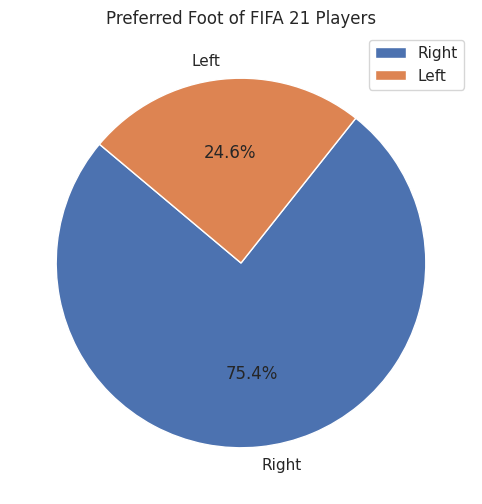

In [78]:
# Put your code here:
preferred_foot = df_fifa['Preferred Foot'].value_counts()

#membuat figure canvas
plt.figure(figsize=(10,6))
plt.pie(preferred_foot,labels=preferred_foot.index, autopct='%1.1f%%', startangle=140)
plt.title("Preferred Foot of FIFA 21 Players")


plt.savefig('preferred-foot.jpg', format='jpeg') # save image
plt.legend(loc='best')
plt.show()

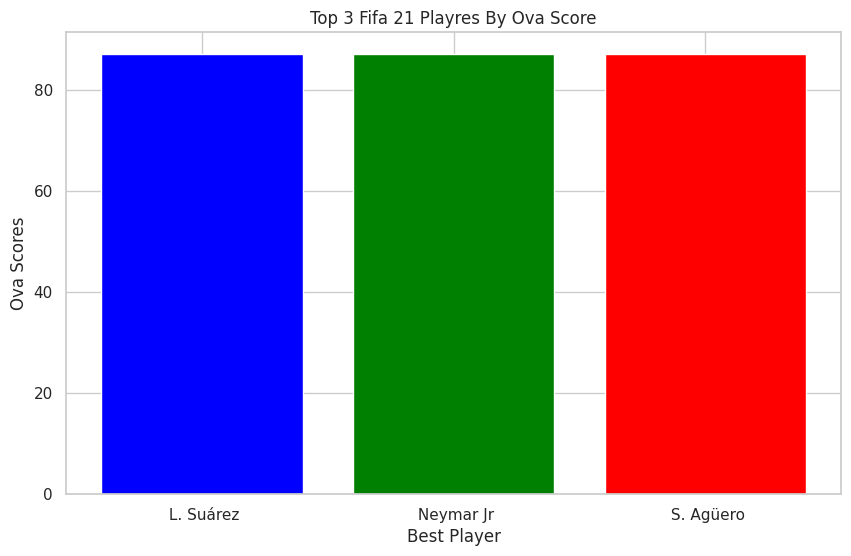

In [79]:
top_3_players = df_fifa.sort_values(by='Overall',ascending=False).head(3)

best_player = top_3_players['Name']
ova_scores =top_3_players['Overall']

#make figure
plt.figure(figsize=(10,6))
plt.bar(best_player,ova_scores,color=['blue', 'green', 'red'])
plt.xlabel("Best Player")
plt.ylabel("Ova Scores")
plt.title("Top 3 Fifa 21 Playres By Ova Score")

plt.savefig('top-3-players.jpg', format='jpeg') # save image
plt.show()

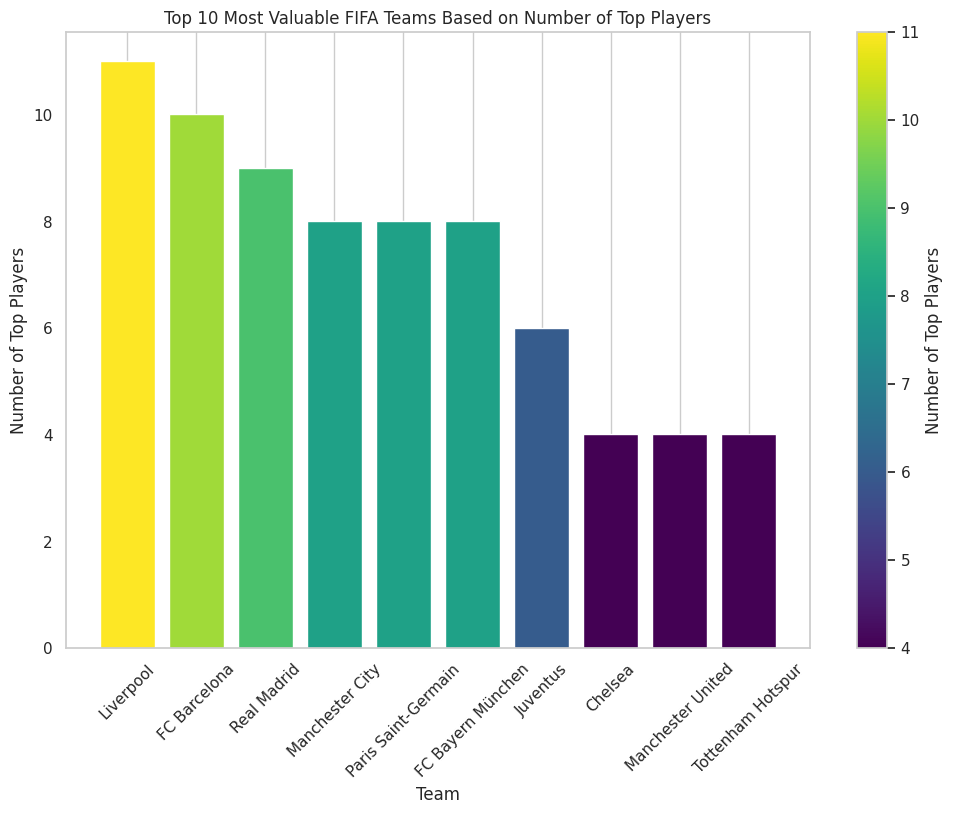

In [85]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#Score Top 100 sort_values
sort_ova_data = df_fifa.sort_values(by='Overall',ascending=False)

#melihat top 100 pemain
top_100_players = sort_ova_data.head(100)

## menghitung jumlahnya
top_10_club = top_100_players['Club'].value_counts().head(10)

#data for ploting
clubs = top_10_club.index
num_players = top_10_club.values

# Creating the bar plot with gradient colors
plt.figure(figsize=(12, 8))

# Create a color map
norm = plt.Normalize(num_players.min(), num_players.max())
colors = cm.viridis(norm(num_players))

# Create the bar plot with gradient colors
plt.bar(clubs, num_players, color=colors)
plt.xlabel('Team')
plt.ylabel('Number of Top Players')
plt.title('Top 10 Most Valuable FIFA Teams Based on Number of Top Players')
plt.xticks(rotation=45)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.viridis), ax=plt.gca(), orientation='vertical', label='Number of Top Players')
plt.grid(axis='y')

plt.savefig('best-fifa-teams.jpg', format='jpeg') # save image
plt.show()

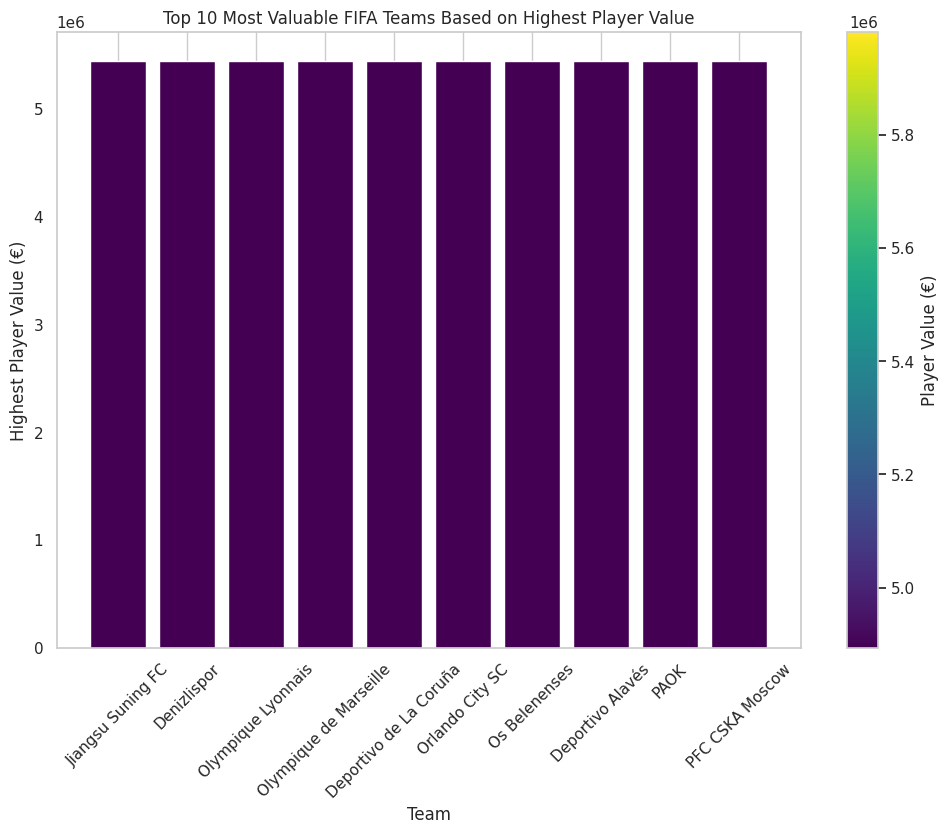

In [89]:
# Convert 'Numeric_Value' New Colom from string to numeric
df_fifa['Numeric_Value'] = df_fifa['Value'].apply(convert_financial_column)  # Use the appropriate conversion function

# Sort the DataFrame by 'Numeric_Value' and group by 'Club'
grouped_fifa_data = df_fifa.sort_values(by='Numeric_Value', ascending=False).groupby('Club')

# Identify the player with the highest 'Value' for each team
highest_value_players = grouped_fifa_data.first()

# Sort these players to find the top 10 teams
top_10_valuable_teams = highest_value_players.sort_values(by='Numeric_Value', ascending=False).head(10)

# Data for plotting
teams = top_10_valuable_teams.index
highest_values = top_10_valuable_teams['Numeric_Value']

# Cleaning team names (removing extra newlines)
cleaned_teams = [team.strip() for team in teams]

# Normalize the highest_values for colormap
norm = plt.Normalize(highest_values.min(), highest_values.max())
colors = cm.viridis(norm(highest_values))

# Creating the bar plot with gradient colors
plt.figure(figsize=(12, 8))
plt.bar(cleaned_teams, highest_values, color=colors)
plt.xlabel('Team')
plt.ylabel('Highest Player Value (€)')
plt.title('Top 10 Most Valuable FIFA Teams Based on Highest Player Value')
plt.xticks(rotation=45)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.viridis), ax=plt.gca(), orientation='vertical', label='Player Value (€)')
plt.grid(axis='y')

plt.savefig('top-10-valuable-teams-gradient.jpg', format='jpeg')  # save image
plt.show()

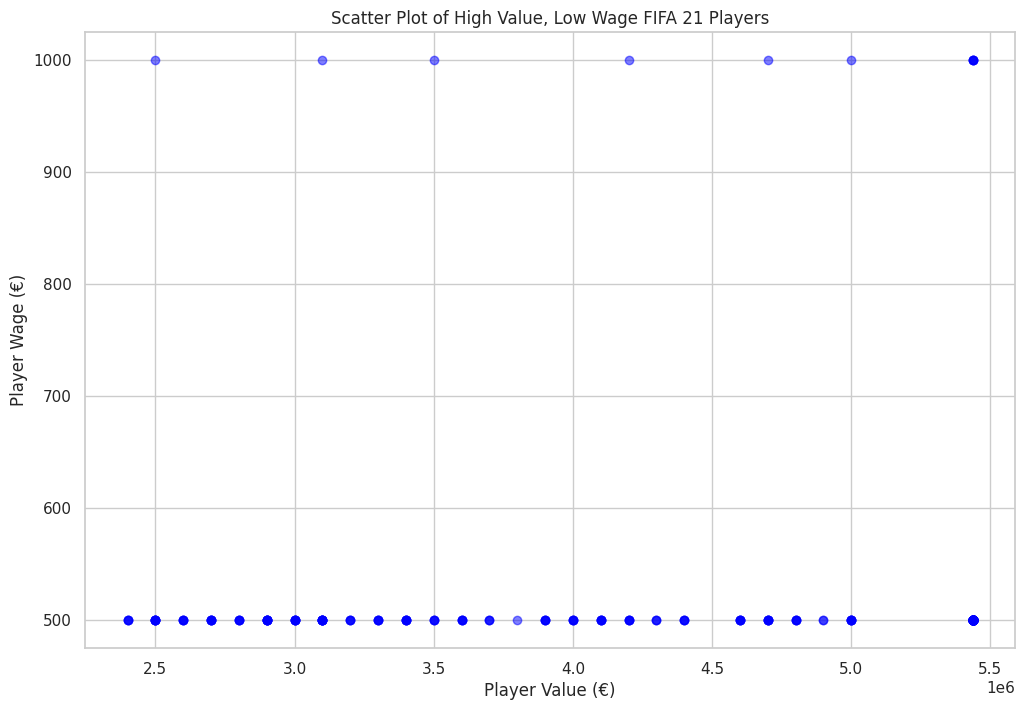

<Figure size 640x480 with 0 Axes>

In [91]:
# Convert 'Value' and 'Wage' from strings to numeric values
value = df_fifa['Value']
wage = df_fifa['Wage']

# Define high value and low wage based on percentiles
high_value_threshold = value.quantile(0.75)  # Top 25% in value
low_wage_threshold = wage.quantile(0.25)     # Bottom 25% in wage

# Filter players meeting these criteria
high_value_low_wage_players = df_fifa[(df_fifa['Value'] >= high_value_threshold) &
                                        (df_fifa['Wage'] <= low_wage_threshold)]

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(high_value_low_wage_players['Value'], high_value_low_wage_players['Wage'], color='blue', alpha=0.5)
plt.xlabel('Player Value (€)')
plt.ylabel('Player Wage (€)')
plt.title('Scatter Plot of High Value, Low Wage FIFA 21 Players')
plt.grid(True)

# Show the plot
plt.show()

plt.savefig('high-value-underpaid-players.jpg', format='jpeg') # save image
plt.show()

## Handling Outlier Data

In [38]:
df_fifa.head()

ID              Name  Age  \
0  176580         L. Suárez   33   
1  192985      K. De Bruyne   29   
2  212198   Bruno Fernandes   25   
3  194765      A. Griezmann   29   
4  224334          M. Acuña   28   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/20_60.png     Uruguay   
1  https://cdn.sofifa.com/players/192/985/20_60.png     Belgium   
2  https://cdn.sofifa.com/players/212/198/20_60.png    Portugal   
3  https://cdn.sofifa.com/players/194/765/20_60.png      France   
4  https://cdn.sofifa.com/players/224/334/20_60.png   Argentina   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       87         87    Atlético Madrid   
1  https://cdn.sofifa.com/flags/be.png       91         91    Manchester City   
2  https://cdn.sofifa.com/flags/pt.png       87         90  Manchester United   
3  https://cdn.sofifa.com/flags/fr.png       87         87       FC Barcelona   
4  https://cdn.sofifa.com/flags/ar.png       83         83         Sevilla FC   

                                       Club Logo  ...  SlidingTackle  \
0  https://cdn.sofifa.com/teams/240/light_30.png  ...          38.00   
1   https://cdn.sofifa.com/teams/10/light_30.png  ...          53.00   
2   https://cdn.sofifa.com/teams/11/light_30.png  ...          55.00   
3  https://cdn.sofifa.com/teams/241/light_30.png  ...          49.00   
4  https://cdn.sofifa.com/teams/481/light_30.png  ...          79.00   

   GKDiving  GKHandling GKKicking  GKPositioning  GKReflexes  Best Position  \
0     27.00       25.00     31.00          33.00       37.00             ST   
1     15.00       13.00      5.00          10.00       13.00            CAM   
2     12.00       14.00     15.00           8.00       14.00            CAM   
3     14.00        8.00     14.00          13.00       14.00             ST   
4      8.00       14.00     13.00          13.00       14.00             LB   

  Best Overall Rating Release Clause DefensiveAwareness  
0               87.00    64600000.00              57.00  
1               91.00   161000000.00              68.00  
2               88.00   124400000.00              72.00  
3               87.00   103500000.00              59.00  
4               83.00    46200000.00              79.00  

[5 rows x 65 columns]

In [39]:
df_fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [40]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        17108 non-null  int64         
 1   Name                      17108 non-null  object        
 2   Age                       17108 non-null  int64         
 3   Photo                     17108 non-null  object        
 4   Nationality               17108 non-null  object        
 5   Flag                      17108 non-null  object        
 6   Overall                   17108 non-null  int64         
 7   Potential                 17108 non-null  int64         
 8   Club                      17108 non-null  object        
 9   Club Logo                 17108 non-null  object        
 10  Value                     17108 non-null  float64       
 11  Wage                      17108 non-null  float64       
 12  Special           

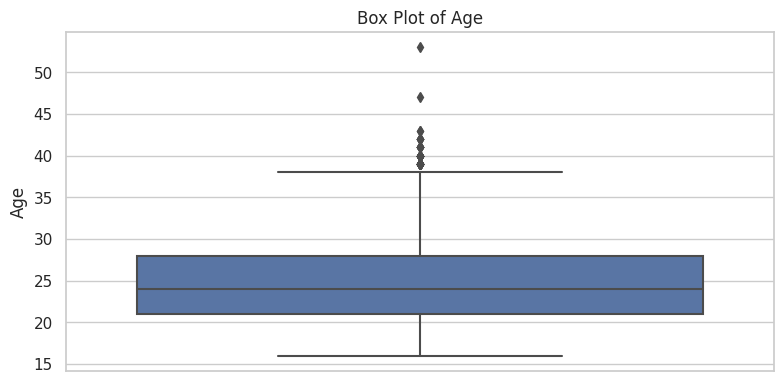

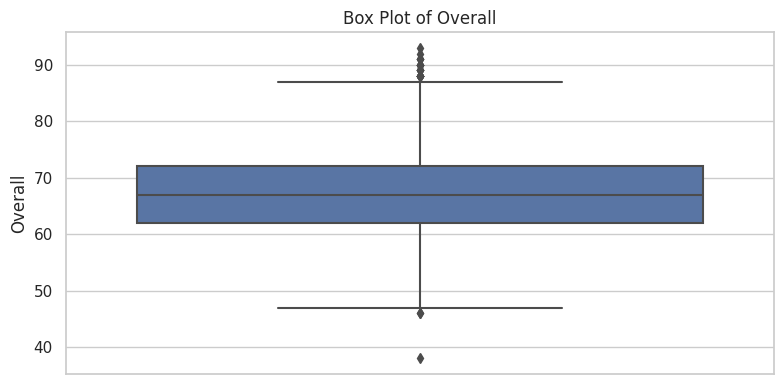

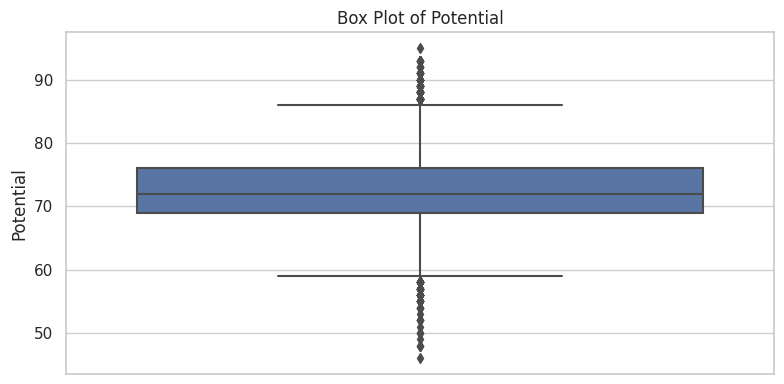

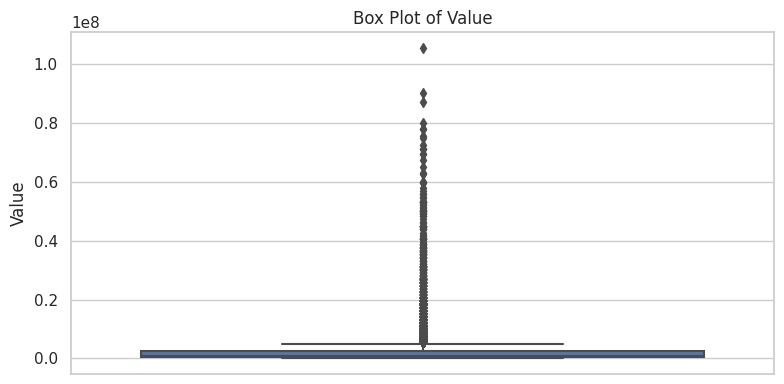

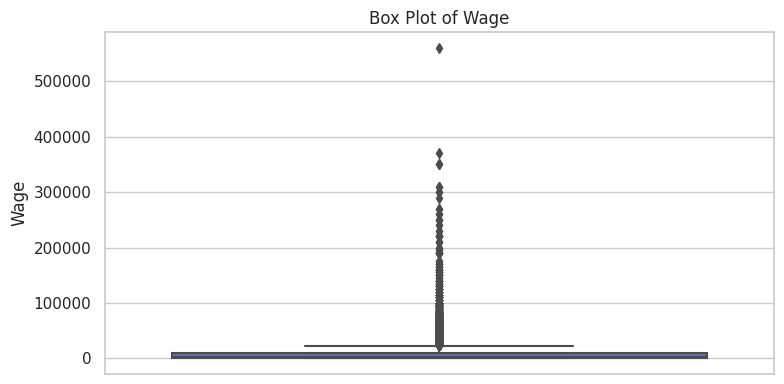

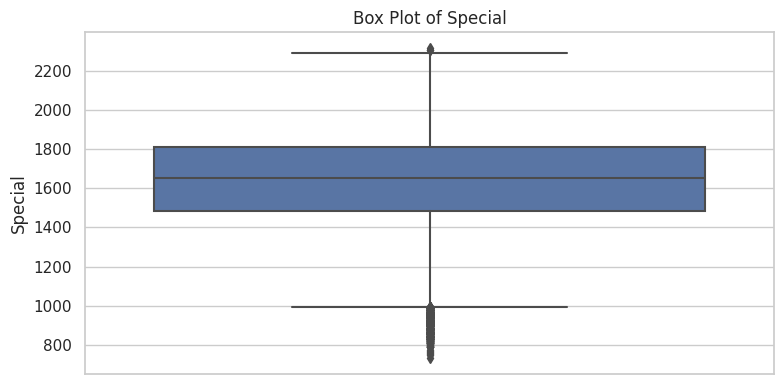

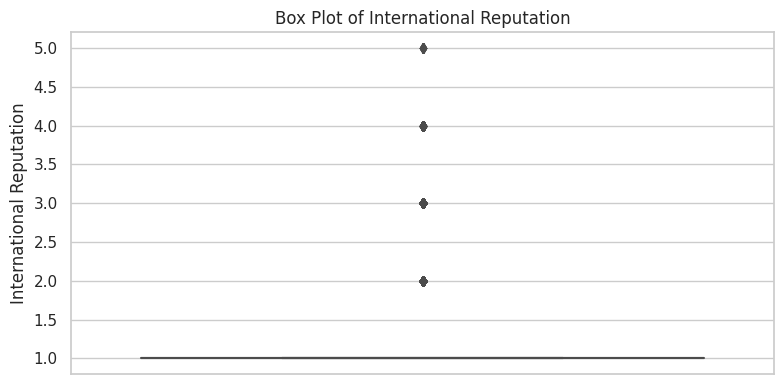

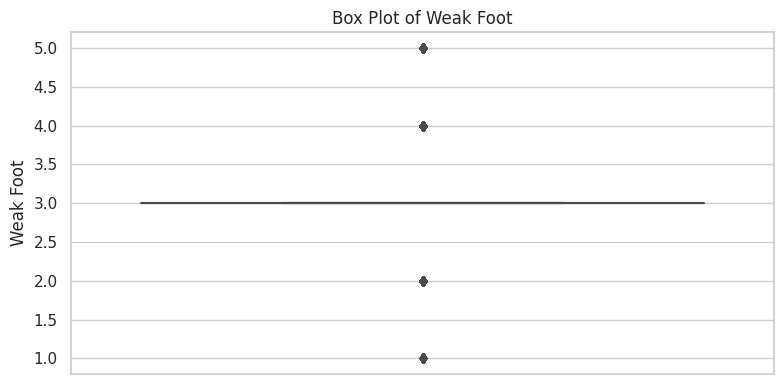

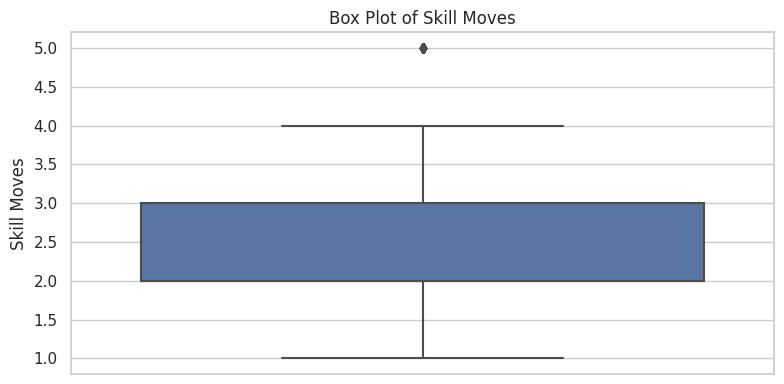

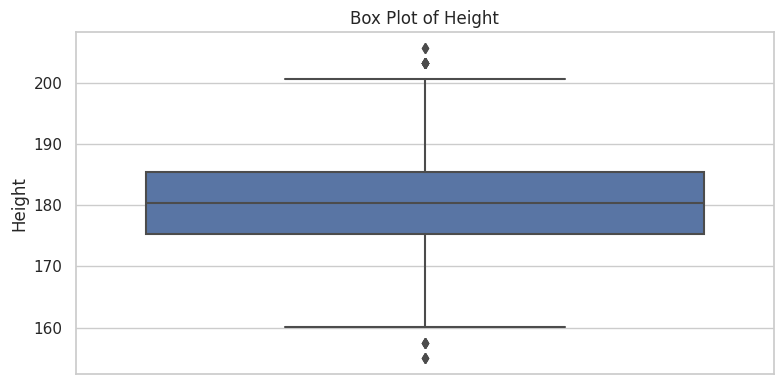

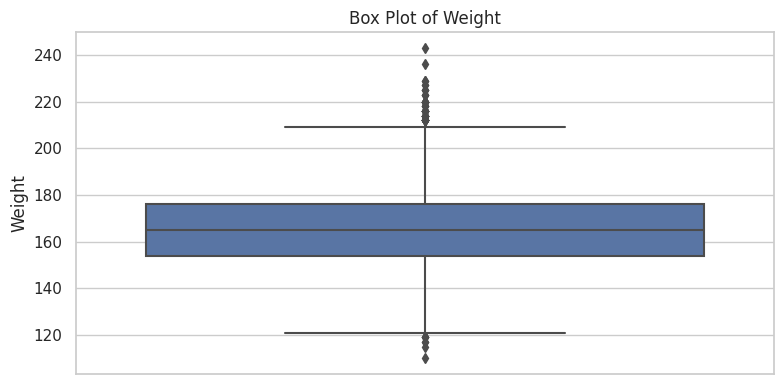

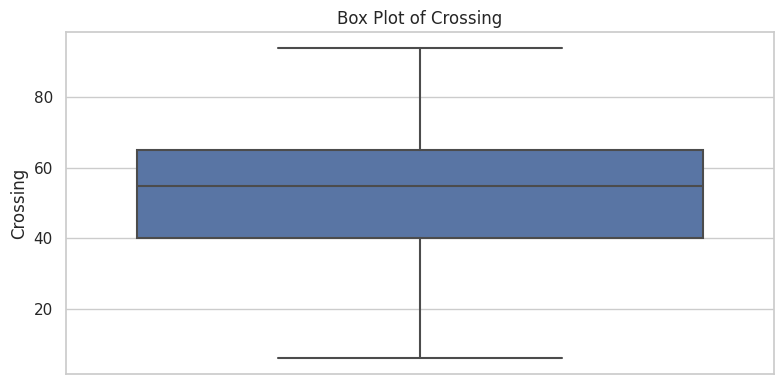

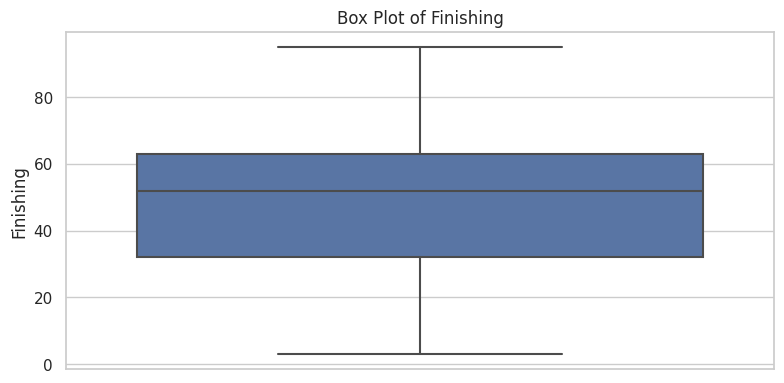

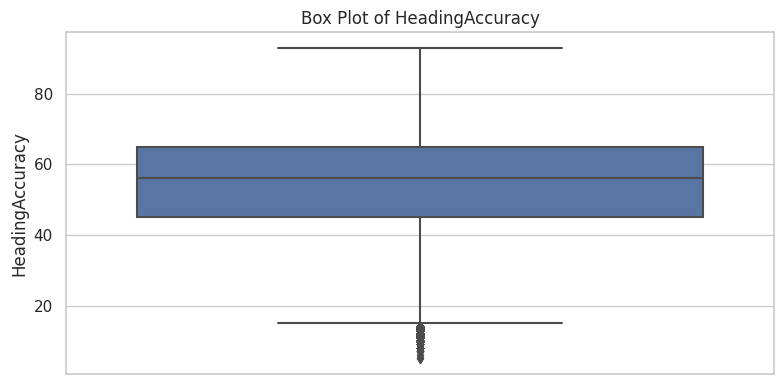

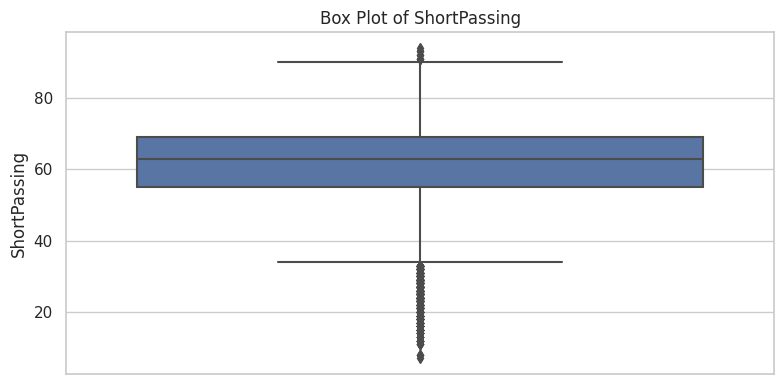

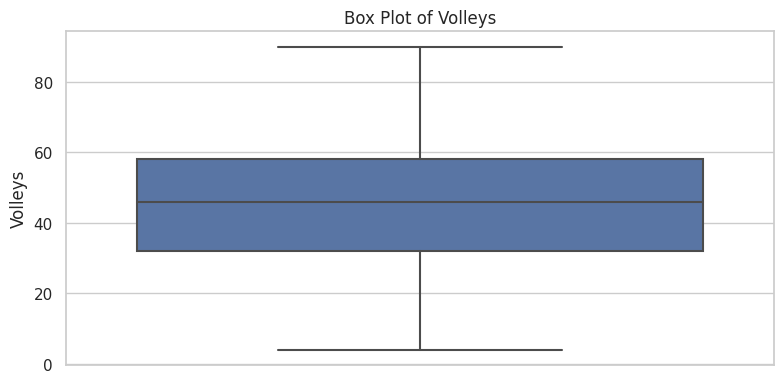

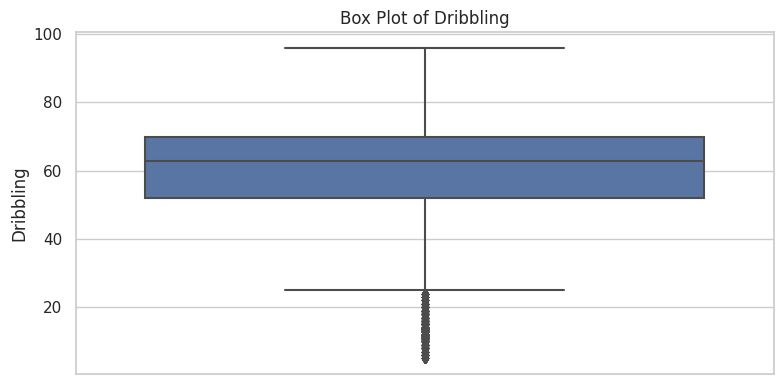

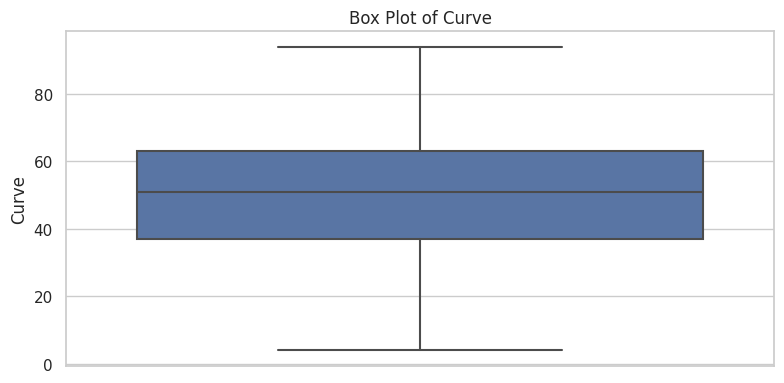

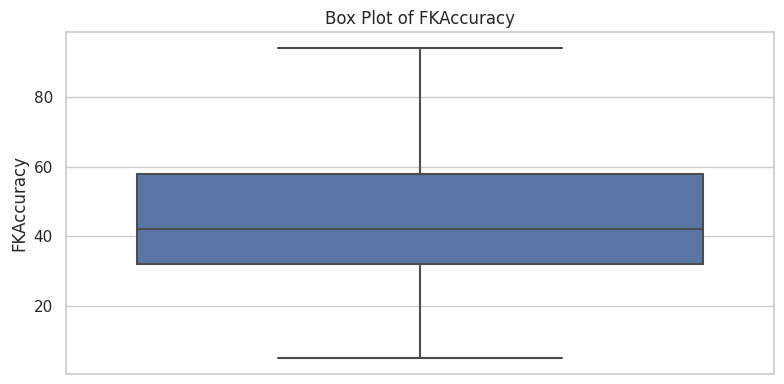

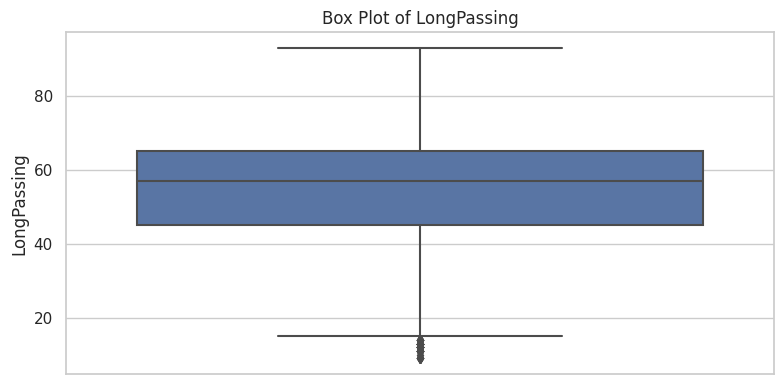

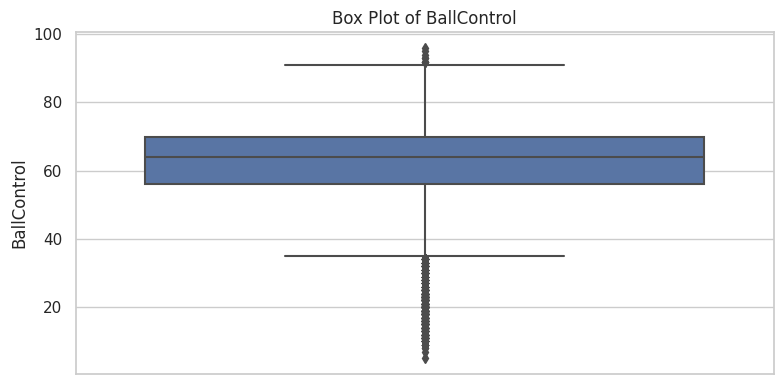

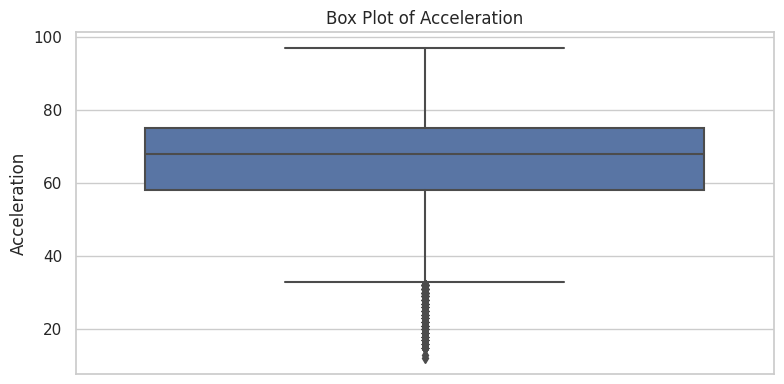

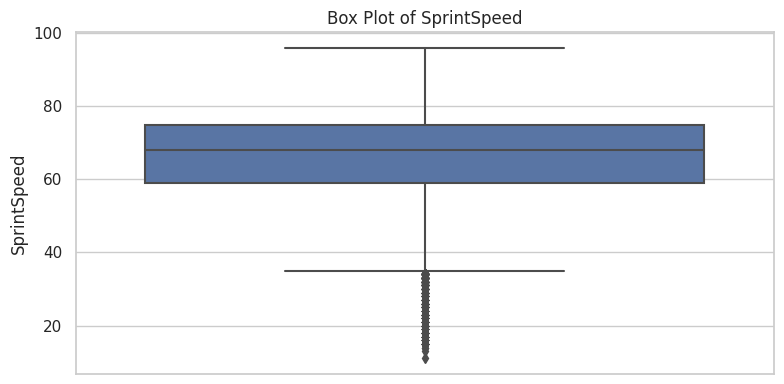

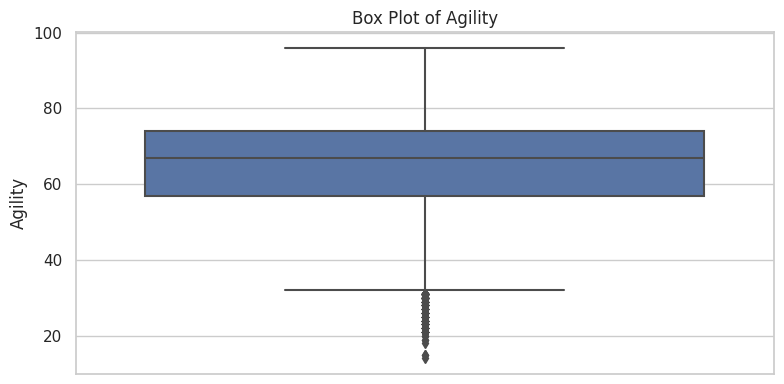

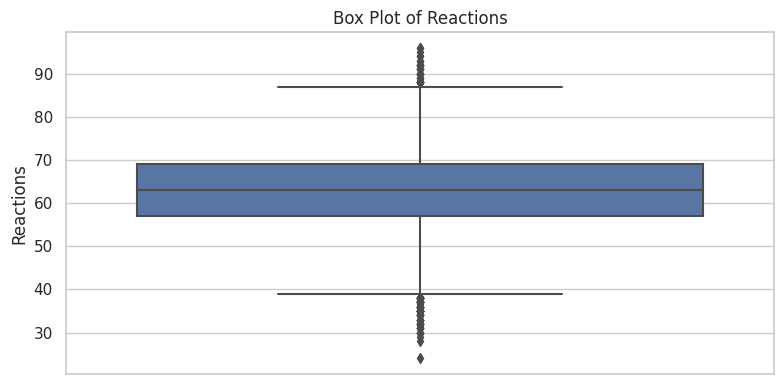

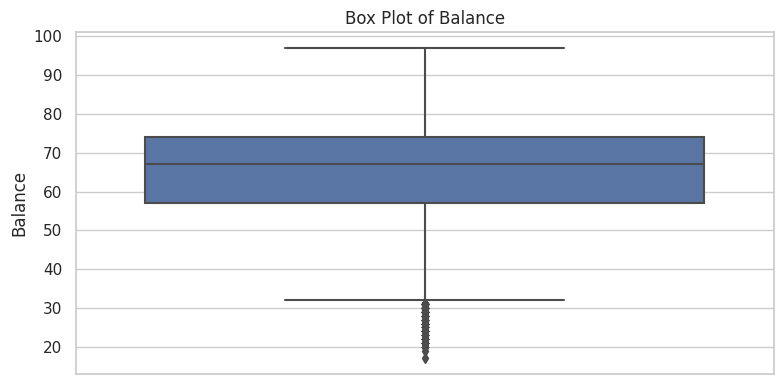

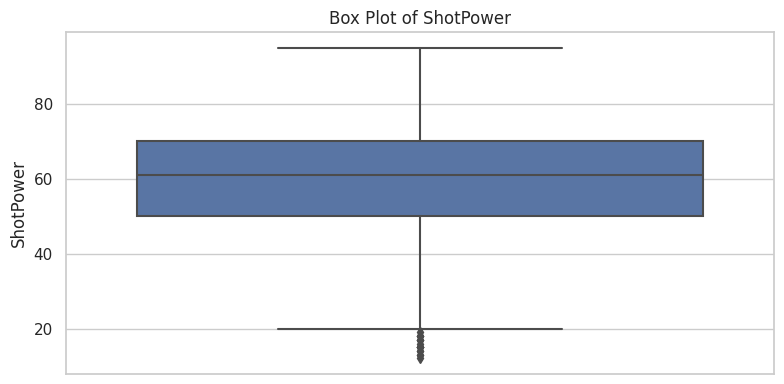

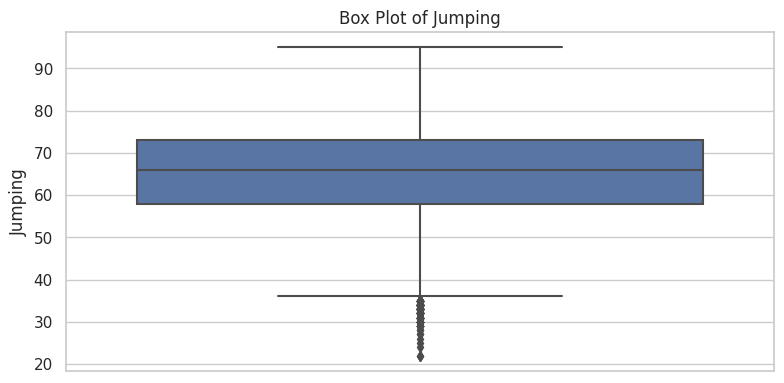

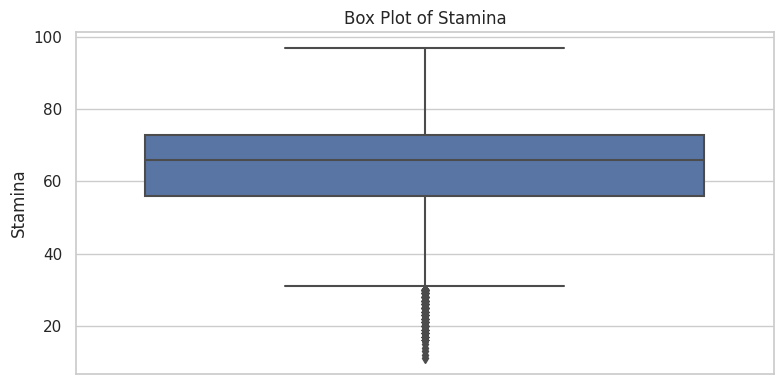

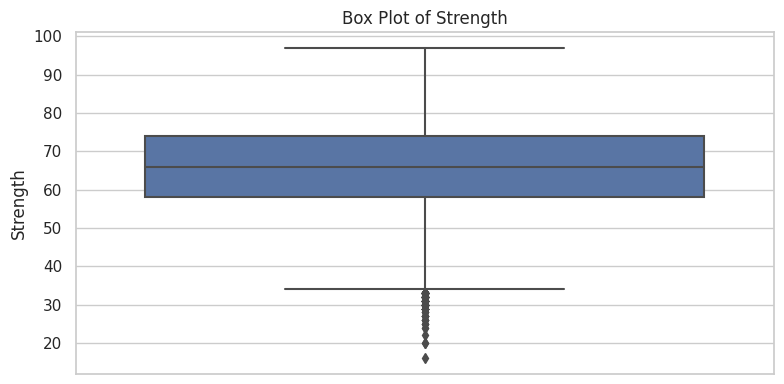

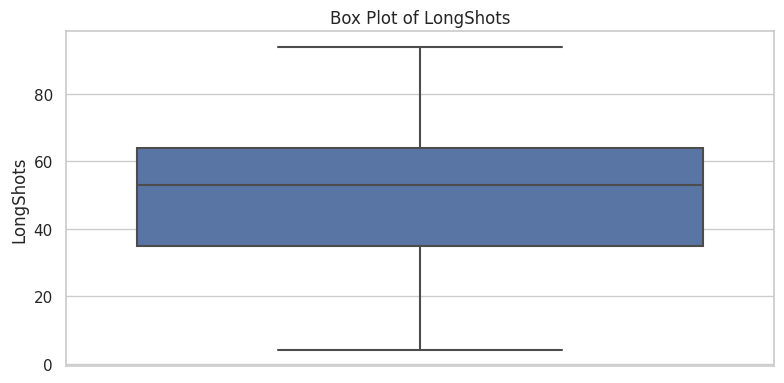

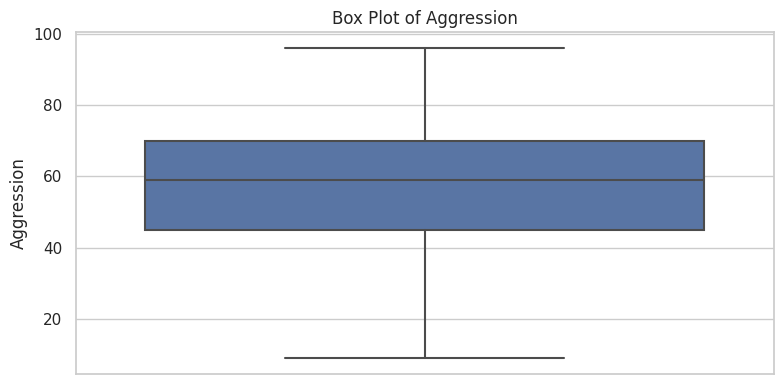

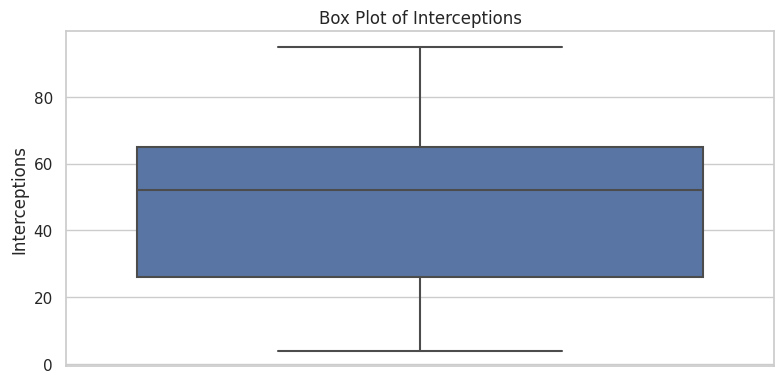

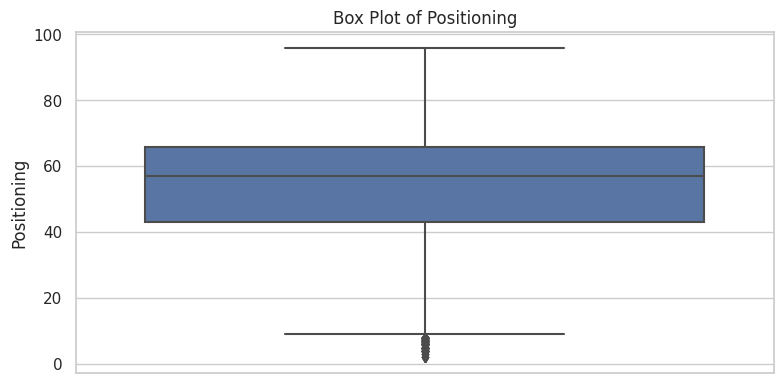

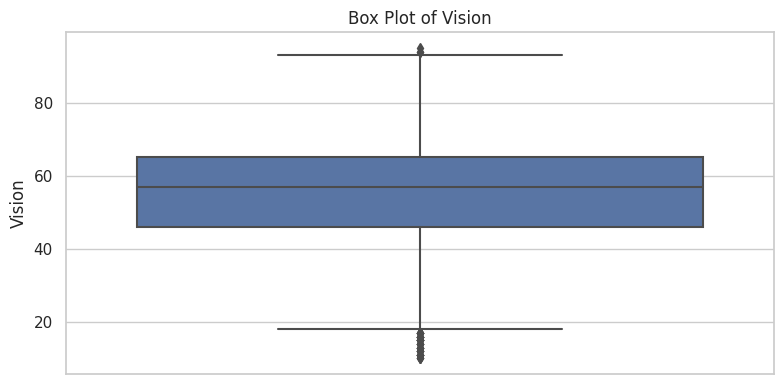

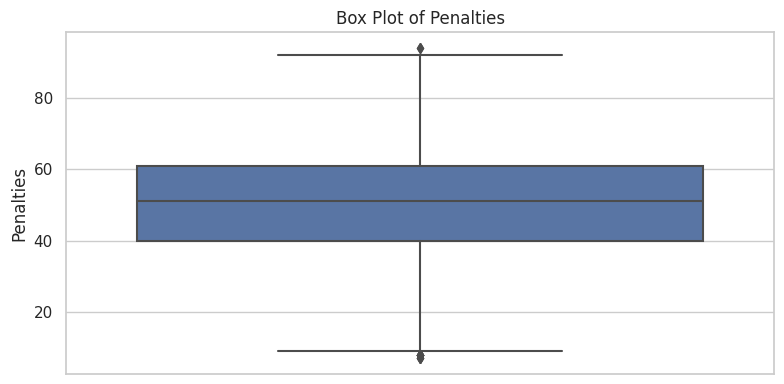

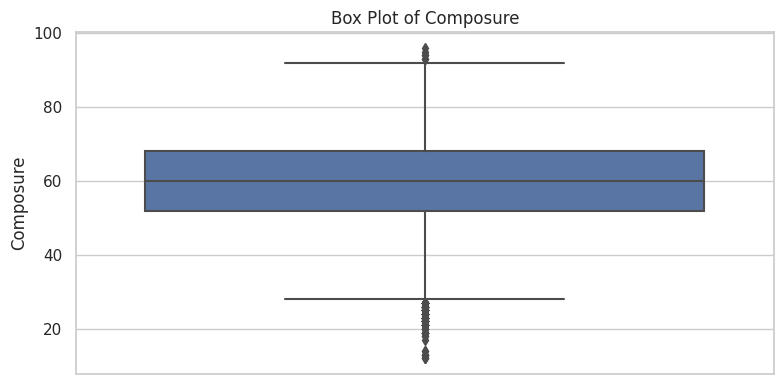

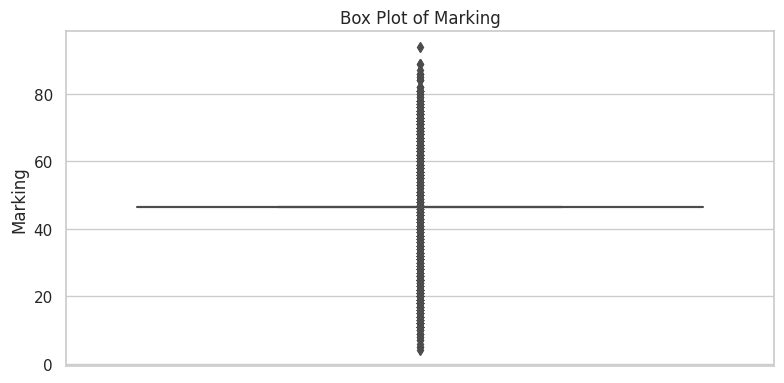

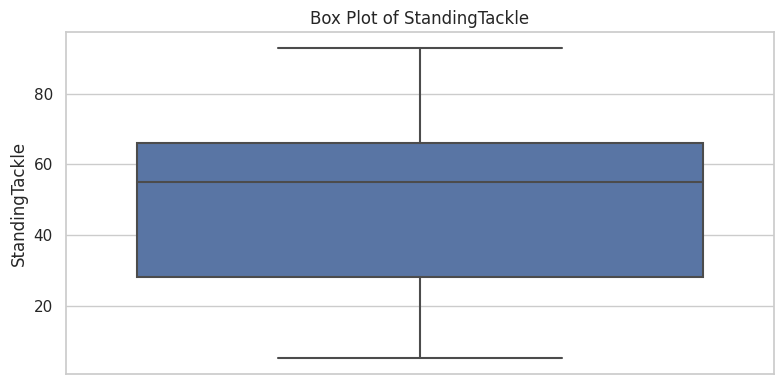

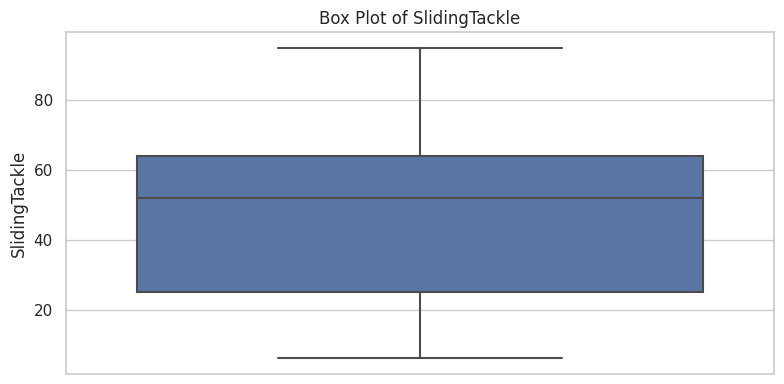

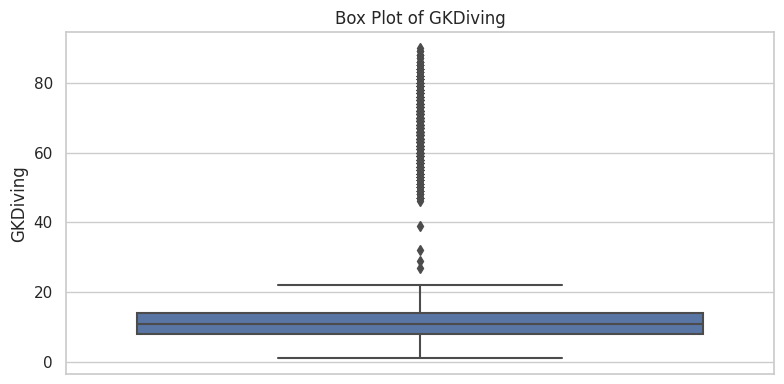

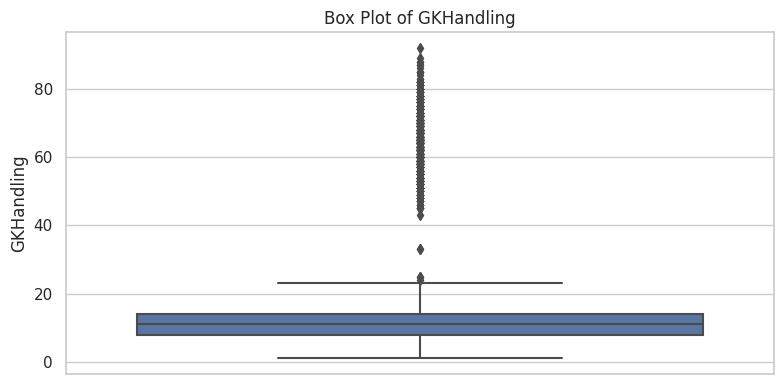

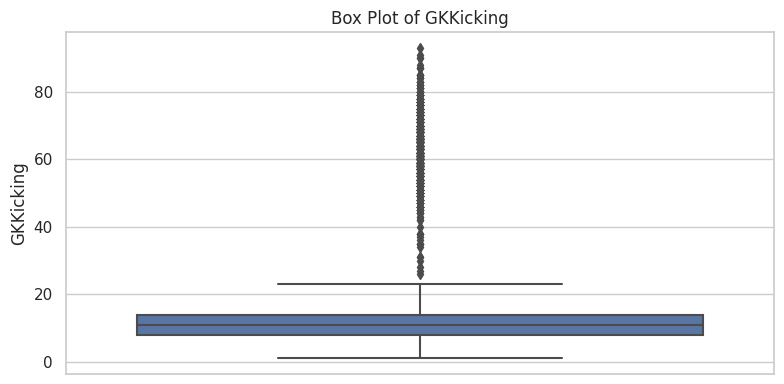

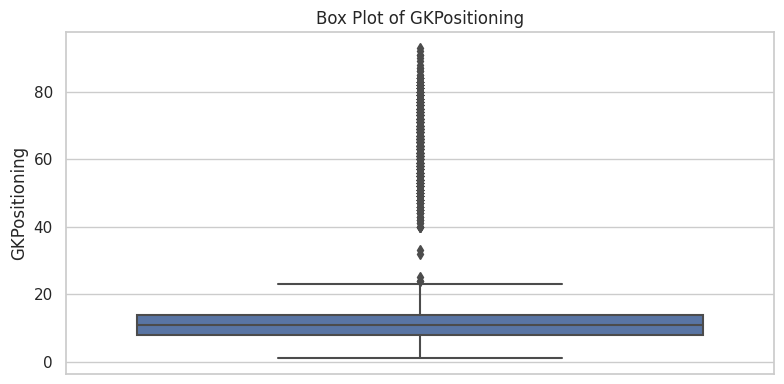

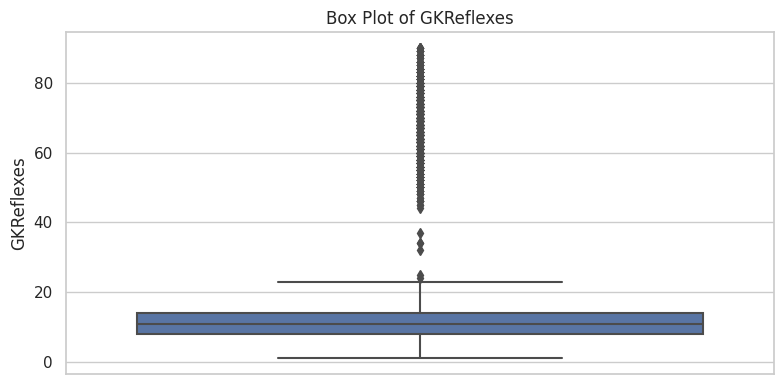

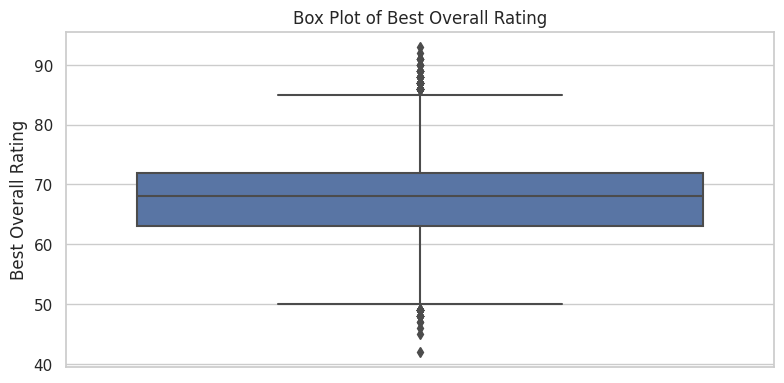

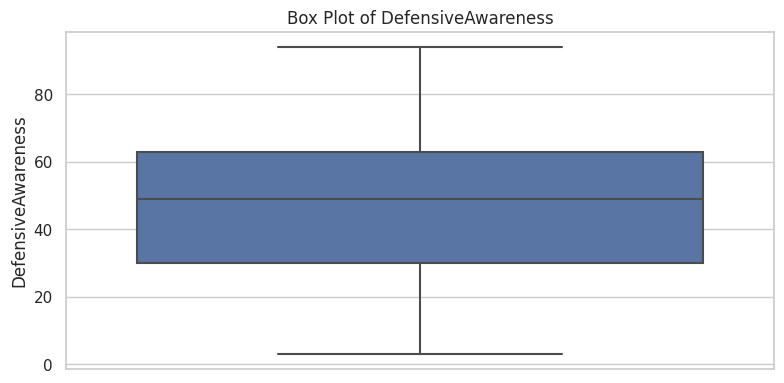

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom-kolom numerik
numeric_columns = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating', 'DefensiveAwareness']

# Membuat box plot untuk setiap kolom numerik dalam frame gambar terpisah
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.set(style="whitegrid")
    sns.boxplot(y=df_fifa[column])
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [42]:
import pandas as pd

# Pilih kolom-kolom numerik yang akan Anda proses outlier-nya
numeric_columns = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating', 'DefensiveAwareness']

# Iterasi melalui kolom-kolom numerik dan lakukan penanganan outlier untuk masing-masing kolom
for column in numeric_columns:
    # Hitung Q1 dan Q3
    Q1 = df_fifa[column].quantile(0.25)
    Q3 = df_fifa[column].quantile(0.75)

    # Hitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Hitung batas atas (upper bound) dan batas bawah (lower bound) untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi dan tampilkan outlier
    outliers = df_fifa[(df_fifa[column] < lower_bound) | (df_fifa[column] > upper_bound)]
    print(f"Number of Outliers in '{column}': {len(outliers)}")

    # Penanganan outlier (misalnya, mengganti outlier dengan nilai batas)
    df_fifa[column] = np.where(df_fifa[column] < lower_bound, lower_bound, df_fifa[column])
    df_fifa[column] = np.where(df_fifa[column] > upper_bound, upper_bound, df_fifa[column])

Number of Outliers in 'Age': 78
Number of Outliers in 'Overall': 32
Number of Outliers in 'Potential': 300
Number of Outliers in 'Value': 2311
Number of Outliers in 'Wage': 2002
Number of Outliers in 'Special': 510
Number of Outliers in 'International Reputation': 1921
Number of Outliers in 'Weak Foot': 6593
Number of Outliers in 'Skill Moves': 67
Number of Outliers in 'Height': 20
Number of Outliers in 'Weight': 70
Number of Outliers in 'Crossing': 0
Number of Outliers in 'Finishing': 0
Number of Outliers in 'HeadingAccuracy': 1046
Number of Outliers in 'ShortPassing': 1361
Number of Outliers in 'Volleys': 0
Number of Outliers in 'Dribbling': 1616
Number of Outliers in 'Curve': 0
Number of Outliers in 'FKAccuracy': 0
Number of Outliers in 'LongPassing': 49
Number of Outliers in 'BallControl': 1685
Number of Outliers in 'Acceleration': 678
Number of Outliers in 'SprintSpeed': 871
Number of Outliers in 'Agility': 447
Number of Outliers in 'Reactions': 173
Number of Outliers in 'Balance'

## Data Sesudah di hapus Outlier disini saya menghapus outliernya

In [43]:
# Salin DataFrame asli ke DataFrame baru
df_fifa_cleaned = df_fifa.copy()

# Pilih kolom-kolom numerik yang akan Anda proses outlier-nya
numeric_columns = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating', 'DefensiveAwareness','Release Clause']

# Iterasi melalui kolom-kolom numerik dan lakukan penanganan outlier untuk masing-masing kolom
for column in numeric_columns:
    # Hitung Q1 dan Q3
    Q1 = df_fifa_cleaned[column].quantile(0.25)
    Q3 = df_fifa_cleaned[column].quantile(0.75)

    # Hitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Hitung batas atas (upper bound) dan batas bawah (lower bound) untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi dan tampilkan outlier
    outliers = df_fifa_cleaned[(df_fifa_cleaned[column] < lower_bound) | (df_fifa_cleaned[column] > upper_bound)]
    print(f"Number of Outliers in '{column}': {len(outliers)}")

    # Hapus outlier dari DataFrame baru
    df_fifa_cleaned = df_fifa_cleaned[(df_fifa_cleaned[column] >= lower_bound) & (df_fifa_cleaned[column] <= upper_bound)]


Number of Outliers in 'Age': 0
Number of Outliers in 'Overall': 0
Number of Outliers in 'Potential': 0
Number of Outliers in 'Value': 0
Number of Outliers in 'Wage': 0
Number of Outliers in 'Special': 0
Number of Outliers in 'International Reputation': 0
Number of Outliers in 'Weak Foot': 0
Number of Outliers in 'Skill Moves': 0
Number of Outliers in 'Height': 0
Number of Outliers in 'Weight': 0
Number of Outliers in 'Crossing': 0
Number of Outliers in 'Finishing': 0
Number of Outliers in 'HeadingAccuracy': 0
Number of Outliers in 'ShortPassing': 0
Number of Outliers in 'Volleys': 0
Number of Outliers in 'Dribbling': 0
Number of Outliers in 'Curve': 0
Number of Outliers in 'FKAccuracy': 0
Number of Outliers in 'LongPassing': 0
Number of Outliers in 'BallControl': 0
Number of Outliers in 'Acceleration': 0
Number of Outliers in 'SprintSpeed': 0
Number of Outliers in 'Agility': 0
Number of Outliers in 'Reactions': 0
Number of Outliers in 'Balance': 0
Number of Outliers in 'ShotPower': 0
N

In [44]:
df_fifa_cleaned.shape

(14760, 65)

## Data Normalization And Encode Using Scikit Learn On Data Numeric And Categoric

## Data Categorization

In [45]:
# List kolom-kolom categorical
categorical_columns = ['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Loaned From', 'Best Position']

# Buat DataFrame baru yang hanya berisi kolom-kolom categorical
df_categorical = df_fifa[categorical_columns]
df_categorical

Name       Nationality               Club Preferred Foot  \
0             L. Suárez           Uruguay    Atlético Madrid          Right   
1          K. De Bruyne           Belgium    Manchester City          Right   
2       Bruno Fernandes          Portugal  Manchester United          Right   
3          A. Griezmann            France       FC Barcelona           Left   
4              M. Acuña         Argentina         Sevilla FC           Left   
...                 ...               ...                ...            ...   
17103      19 C. Miszta            Poland     Legia Warszawa          Right   
17104           B. Voll           Germany   FC Hansa Rostock          Right   
17105         T. Parker  Northern Ireland         Luton Town          Right   
17106        H. Sveijer            Sweden          IK Sirius          Right   
17107       19 J. Milli             Italy              Lecce          Right   

            Work Rate             Body Type Real Face Position  \
0        High/ Medium  PLAYER_BODY_TYPE_374       Yes       RS   
1          High/ High  PLAYER_BODY_TYPE_321       Yes      RCM   
2          High/ High        Lean (170-185)       Yes      CAM   
3      Medium/ Medium  PLAYER_BODY_TYPE_266       Yes       RW   
4          High/ High      Stocky (170-185)        No       LB   
...               ...                   ...       ...      ...   
17103  Medium/ Medium         Normal (185+)        No      RES   
17104  Medium/ Medium         Normal (185+)        No      RES   
17105  Medium/ Medium         Normal (185+)        No      RES   
17106  Medium/ Medium           Lean (185+)        No      SUB   
17107  Medium/ Medium      Normal (170-185)        No      RES   

          Loaned From Best Position  
0      Unknown Loaned            ST  
1      Unknown Loaned           CAM  
2      Unknown Loaned           CAM  
3      Unknown Loaned            ST  
4      Unknown Loaned            LB  
...               ...           ...  
17103  Unknown Loaned            GK  
17104  Unknown Loaned            GK  
17105  Unknown Loaned            GK  
17106  Unknown Loaned            GK  
17107  Unknown Loaned            GK  

[17108 rows x 10 columns]

In [46]:
unique_values = {}  # Membuat dictionary untuk menyimpan unique values dari setiap kolom

# Kolom-kolom yang ingin Anda cek unique values-nya
columns_to_check = ['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Loaned From', 'Best Position']

# Iterate melalui kolom-kolom yang Anda sebutkan
for column in columns_to_check:
    unique_values[column] = df_categorical[column].unique()

# Cetak unique values dari setiap kolom
for column in columns_to_check:
    print(f"Unique values in '{column}': {unique_values[column]}")

Unique values in 'Name': [' L. Suárez' ' K. De Bruyne' ' Bruno Fernandes' ... ' B. Voll'
 ' H. Sveijer' ' 19\xa0J. Milli']
Unique values in 'Nationality': ['Uruguay' 'Belgium' 'Portugal' 'France' 'Argentina' 'Brazil' 'Germany'
 'Netherlands' 'Spain' 'Croatia' 'Austria' 'Chile' 'Serbia' 'Italy'
 'England' 'Wales' 'Egypt' 'Senegal' 'Denmark' 'Poland' 'Ghana' 'Mexico'
 'Bosnia Herzegovina' 'Colombia' 'Ecuador' 'Turkey' 'Peru' 'Slovakia'
 'Ukraine' 'Central African Republic' 'Ivory Coast' 'Russia'
 'Korea Republic' 'Switzerland' 'Scotland' 'North Macedonia' 'Morocco'
 'Nigeria' 'Czech Republic' 'Canada' 'Algeria' 'Norway' 'China PR'
 'Paraguay' 'Angola' 'Montenegro' 'Finland' 'Guinea' 'Armenia' 'Benin'
 'Gabon' 'Iraq' 'Liberia' 'Israel' 'Iceland' 'Australia'
 'Republic of Ireland' 'Slovenia' 'United States' 'Northern Ireland'
 'Romania' 'Cameroon' 'Greece' 'Sweden' 'Kosovo' 'Tunisia' 'Moldova'
 'Venezuela' 'Bulgaria' 'Honduras' 'Mali' 'Guinea Bissau' 'Uzbekistan'
 'DR Congo' 'New Zealand' 

In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df_fifa_cleaned is your cleaned DataFrame

# Create mapping dictionaries
real_face_mapping = {'Yes': 1, 'No': 0}
preferred_foot_mapping = {'Right': 0, 'Left': 1}
work_rate_mapping = {
    'High/ Medium': 1, 'High/ High': 2, 'Medium/ Medium': 3, 'Medium/ High': 4,
    'Medium/ Low': 5, 'High/ Low': 6, 'Low/ High': 7, 'N/A/ N/A': 8,
    'Low/ Medium': 9, 'Low/ Low': 10
}
position_mapping = {
    'RS': 1, 'RCM': 2, 'CAM': 3, 'RW': 4, 'LB': 5, 'LDM': 6, 'SUB': 7, 
    'RDM': 8, 'LCM': 9, 'RCB': 10, 'LCB': 11, 'ST': 12, 'RB': 13, 
    'LS': 14, 'CDM': 15, 'LW': 16, 'LM': 17, 'CF': 18, 'RES': 19, 
    'CM': 20, 'RM': 21, 'LWB': 22, 'LAM': 23, 'LF': 24, 'RF': 25, 
    'RWB': 26, 'CB': 27, 'Unknown Position': 28, 'RAM': 29, 'GK': 30
}

best_position_mapping = {
    'ST': 1, 'CAM': 2, 'LB': 3, 'CM': 4, 'CDM': 5, 'CB': 6, 
    'RW': 7, 'RB': 8, 'LM': 9, 'CF': 10, 'LW': 11, 'RM': 12, 
    'LWB': 13, 'RWB': 14, 'GK': 15
}
        
# Apply mapping functions
df_fifa_cleaned['Real Face'] = df_fifa_cleaned['Real Face'].map(real_face_mapping)
df_fifa_cleaned['Preferred Foot'] = df_fifa_cleaned['Preferred Foot'].map(preferred_foot_mapping)
df_fifa_cleaned['Work Rate'] = df_fifa_cleaned['Work Rate'].map(work_rate_mapping)
df_fifa_cleaned['Position'] = df_fifa_cleaned['Position'].map(position_mapping)
df_fifa_cleaned['Best Position'] = df_fifa_cleaned['Best Position'].map(best_position_mapping)

# Apply mapping for 'Body Type' after simplification
body_type_mapping = {'Lean': 1, 'Normal': 2, 'Stocky': 3, 'Other': 4}
df_fifa_cleaned['Body Type'] = df_fifa_cleaned['Body Type'].map(body_type_mapping)

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 
                        'International Reputation', 'Weak Foot', 'Skill Moves', 
                        'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 
                        'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
                        'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
                        'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                        'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 
                        'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 
                        'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 
                        'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 
                        'Best Overall Rating', 'DefensiveAwareness']  # Adding mapped categorical columns

df_fifa_cleaned[columns_to_normalize] = scaler.fit_transform(df_fifa_cleaned[columns_to_normalize])

# Define df_fifa_final as the cleaned DataFrame
df_fifa_final = df_fifa_cleaned

# Columns to be dropped
columns_to_drop = ['ID', 'Name', 'Body Type', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Contract Valid Until', 'Joined', 'Loaned From']

# Drop the specified columns from df_fifa_final
df_fifa_final = df_fifa_final.drop(columns=columns_to_drop, axis=1)

In [48]:
df_fifa_final

Age  Overall  Potential  Value  Wage  Special  Preferred Foot  \
29    0.62     0.90       0.88   1.00  1.00     1.00               1   
35    0.98     0.80       0.73   0.00  1.00     1.00               1   
36    0.84     0.88       0.84   0.88  1.00     0.99               0   
58    0.80     0.82       0.77   0.59  1.00     0.97               0   
74    0.89     0.78       0.70   0.22  0.85     0.97               0   
...    ...      ...        ...    ...   ...      ...             ...   
17103 0.00     0.07       0.41   0.01  0.02     0.00               0   
17104 0.13     0.10       0.16   0.01  0.02     0.00               0   
17105 0.09     0.10       0.41   0.01  0.02     0.00               0   
17106 0.09     0.05       0.16   0.01  0.02     0.00               0   
17107 0.09     0.00       0.23   0.01  0.02     0.00               0   

       International Reputation  Weak Foot  Skill Moves  ...  SlidingTackle  \
29                         0.00       0.00         0.86  ...           0.52   
35                         0.00       0.00         0.57  ...           0.88   
36                         0.00       0.00         0.86  ...           0.83   
58                         0.00       0.00         0.57  ...           0.75   
74                         0.00       0.00         0.57  ...           0.78   
...                         ...        ...          ...  ...            ...   
17103                      0.00       0.00         0.00  ...           0.08   
17104                      0.00       0.00         0.00  ...           0.04   
17105                      0.00       0.00         0.00  ...           0.06   
17106                      0.00       0.00         0.00  ...           0.04   
17107                      0.00       0.00         0.00  ...           0.06   

       GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
29         0.64        0.64       0.45           0.18        0.23   
35         0.32        0.50       0.41           0.55        0.45   
36         0.18        0.45       0.36           0.23        0.27   
58         0.36        0.55       0.41           0.50        0.27   
74         0.41        0.41       0.23           0.23        0.50   
...         ...         ...        ...            ...         ...   
17103      1.00        1.00       1.00           1.00        1.00   
17104      1.00        1.00       1.00           1.00        1.00   
17105      1.00        1.00       1.00           1.00        1.00   
17106      1.00        1.00       1.00           1.00        1.00   
17107      1.00        1.00       1.00           1.00        1.00   

       Best Position  Best Overall Rating  Release Clause  DefensiveAwareness  
29                 7                 0.93            0.00                0.62  
35                 5                 0.82            0.00                0.54  
36                 2                 0.88            1.00                0.54  
58                 4                 0.82            0.00                0.54  
74                 4                 0.85            0.22                0.54  
...              ...                  ...             ...                 ...  
17103             15                 0.00            0.01                0.54  
17104             15                 0.04            0.01                0.02  
17105             15                 0.04            0.02                0.06  
17106             15                 0.00            0.01                0.06  
17107             15                 0.00            0.01                0.54  

[14760 rows x 54 columns]

In [49]:
# Exploring Data With Loop through each column in the DataFrame
for column in df_fifa_final.columns:
    print(f"First few rows of column '{column}':")
    print(df_fifa_final[column].tail())
    print()  # Add a blank line for better readability

First few rows of column 'Age':
17103   0.00
17104   0.13
17105   0.09
17106   0.09
17107   0.09
Name: Age, dtype: float64

First few rows of column 'Overall':
17103   0.07
17104   0.10
17105   0.10
17106   0.05
17107   0.00
Name: Overall, dtype: float64

First few rows of column 'Potential':
17103   0.41
17104   0.16
17105   0.41
17106   0.16
17107   0.23
Name: Potential, dtype: float64

First few rows of column 'Value':
17103   0.01
17104   0.01
17105   0.01
17106   0.01
17107   0.01
Name: Value, dtype: float64

First few rows of column 'Wage':
17103   0.02
17104   0.02
17105   0.02
17106   0.02
17107   0.02
Name: Wage, dtype: float64

First few rows of column 'Special':
17103   0.00
17104   0.00
17105   0.00
17106   0.00
17107   0.00
Name: Special, dtype: float64

First few rows of column 'Preferred Foot':
17103    0
17104    0
17105    0
17106    0
17107    0
Name: Preferred Foot, dtype: int64

First few rows of column 'International Reputation':
17103   0.00
17104   0.00
17105   0

## Exploring Correlation Feature

In [50]:
import plotly.express as px
import pandas as pd

# Compute the correlation matrix
corr_matrix = df_fifa_final.corr()

# Create a heatmap
fig = px.imshow(corr_matrix, text_auto=True, aspect="auto",
                color_continuous_scale='RdBu_r',  # Red-Blue color scale, reversed
                labels=dict(x="Feature", y="Feature", color="Correlation"))

# Adjust layout for better visibility
fig.update_xaxes(side="bottom")

# Show the plot
fig.show()

# Feature Selection

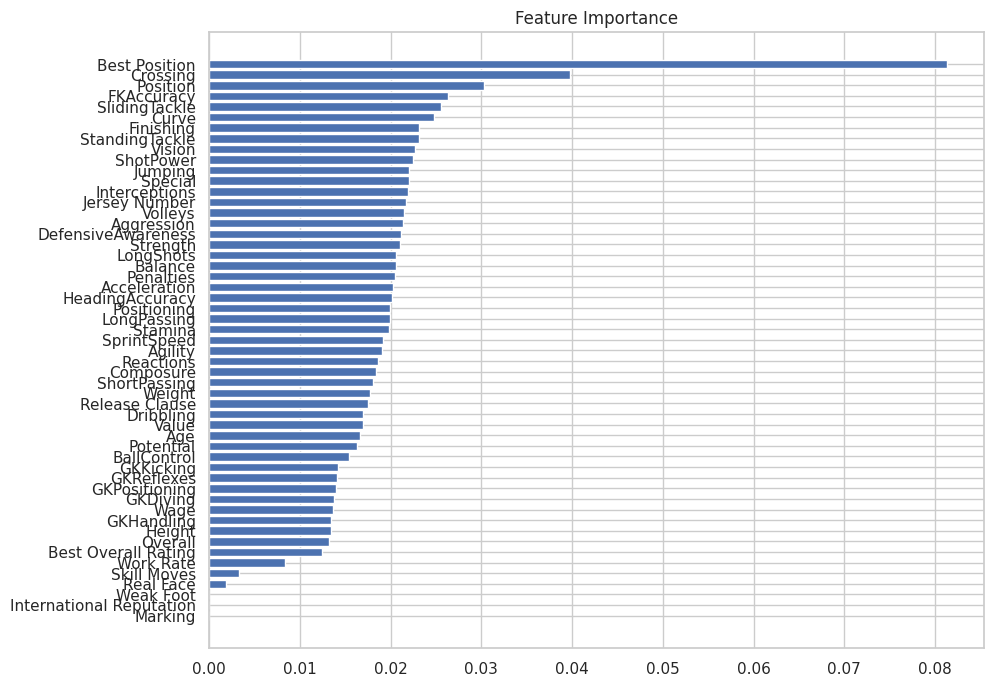

In [61]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df_fifa_final is your DataFrame and 'Target' is your target column
X = df_fifa_final.drop('Preferred Foot', axis=1)  # Features
y = df_fifa_final['Preferred Foot']  # Target variable

# Create a random forest classifier and fit it to your data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# Get feature importances from the model
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Rearrange your features' names to align with the sorted importances
names = [X.columns[i] for i in indices]

# Create the horizontal plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), [names[i] for i in range(X.shape[1])])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


# Modeling Classification

## Modeling Feature Preferred Position

In [53]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming df_fifa_final is your DataFrame and 'Position' is your target column
X = df_fifa_final.drop('Preferred Foot', axis=1)  # Features
y = df_fifa_final['Preferred Foot']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier()
}

# Initialize StratifiedKFold for cross-validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Function to evaluate model
def evaluate_model(model, X, y, cv):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, predictions))
        precisions.append(precision_score(y_test, predictions, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, predictions, average='macro'))
        f1s.append(f1_score(y_test, predictions, average='macro'))

    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Evaluate each model with cross-validation
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X, y, skf)
    print(f"{name} - CV Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Train each model and evaluate on the test set
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(f"{name} - Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Naive Bayes - CV Accuracy: 0.4738482384823848, Precision: 0.5520165575748339, Recall: 0.5648285348855683, F1 Score: 0.46691516564659474
SVM - CV Accuracy: 0.7569783197831977, Precision: 0.37848915989159887, Recall: 0.5, F1 Score: 0.4308410083025952
Random Forest - CV Accuracy: 0.8254065040650407, Precision: 0.8579311774795959, Recall: 0.6532771346352984, F1 Score: 0.6825672784680333
Decision Tree - CV Accuracy: 0.7474932249322493, Precision: 0.6606596027170613, Recall: 0.6673016102982741, F1 Score: 0.6636448284411957
Naive Bayes - Test Accuracy: 0.4722222222222222, Precision: 0.5597574082604022, Recall: 0.5721153846153846, F1 Score: 0.46763576560313025
SVM - Test Accuracy: 0.7533875338753387, Precision: 0.37669376693766937, Recall: 0.5, F1 Score: 0.4296754250386399
Random Forest - Test Accuracy: 0.8150406504065041, Precision: 0.8333352652077151, Recall: 0.642093742588347, F1 Score: 0.6670731707317074
Decision Tree - Test Accuracy: 0.7344173441734417, Precision: 0.6491888888629503, Reca

## Modeling Feature Real Face

In [54]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming df_fifa_final is your DataFrame and 'Position' is your target column
X = df_fifa_final.drop('Real Face', axis=1)  # Features
y = df_fifa_final['Real Face']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier()
}

# Initialize StratifiedKFold for cross-validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Function to evaluate model
def evaluate_model(model, X, y, cv):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, predictions))
        precisions.append(precision_score(y_test, predictions, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, predictions, average='macro'))
        f1s.append(f1_score(y_test, predictions, average='macro'))

    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Evaluate each model with cross-validation
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X, y, skf)
    print(f"{name} - CV Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Train each model and evaluate on the test set
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(f"{name} - Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Naive Bayes - CV Accuracy: 0.7650406504065042, Precision: 0.6003950541813996, Recall: 0.7185802154885648, F1 Score: 0.6077997248683511
SVM - CV Accuracy: 0.9002032520325203, Precision: 0.45010162601626014, Recall: 0.5, F1 Score: 0.4737405029922308
Random Forest - CV Accuracy: 0.9050813008130081, Precision: 0.7698685507203609, Recall: 0.5567231611940308, F1 Score: 0.5765665235373161
Decision Tree - CV Accuracy: 0.8443766937669377, Precision: 0.5823172972526047, Recall: 0.588802359607012, F1 Score: 0.5852050328997486
Naive Bayes - Test Accuracy: 0.7615176151761518, Precision: 0.6059233804119247, Recall: 0.7230023474377336, F1 Score: 0.6137179955197258
SVM - Test Accuracy: 0.893970189701897, Precision: 0.4469850948509485, Recall: 0.5, F1 Score: 0.4720085852262565
Random Forest - Test Accuracy: 0.8987127371273713, Precision: 0.757249826869806, Recall: 0.5575636768211407, F1 Score: 0.5763992438374625
Decision Tree - Test Accuracy: 0.8458672086720868, Precision: 0.6030608344255133, Recall: 0

## Modeling Feature Best Position

In [55]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming df_fifa_final is your DataFrame and 'Position' is your target column
X = df_fifa_final.drop('Best Position', axis=1)  # Features
y = df_fifa_final['Best Position']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier()
}

# Initialize StratifiedKFold for cross-validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Function to evaluate model
def evaluate_model(model, X, y, cv):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, predictions))
        precisions.append(precision_score(y_test, predictions, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, predictions, average='macro'))
        f1s.append(f1_score(y_test, predictions, average='macro'))

    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Evaluate each model with cross-validation
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X, y, skf)
    print(f"{name} - CV Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Train each model and evaluate on the test set
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(f"{name} - Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Naive Bayes - CV Accuracy: 0.6165989159891598, Precision: 0.49887544622174296, Recall: 0.5320453005449611, F1 Score: 0.4750690824305476
SVM - CV Accuracy: 0.5470867208672086, Precision: 0.2734755931668499, Recall: 0.26492102449750904, F1 Score: 0.2298834199306888
Random Forest - CV Accuracy: 0.777710027100271, Precision: 0.6440624545704072, Recall: 0.5261294852953986, F1 Score: 0.5234141626080785
Decision Tree - CV Accuracy: 0.6488482384823848, Precision: 0.45862160812360014, Recall: 0.46032795096521645, F1 Score: 0.4585569736521428
Naive Bayes - Test Accuracy: 0.6192411924119241, Precision: 0.5021790299893661, Recall: 0.5356551163102914, F1 Score: 0.47647211924228033
SVM - Test Accuracy: 0.5443766937669376, Precision: 0.2638336357107009, Recall: 0.26621125574609134, F1 Score: 0.23034558847879616
Random Forest - Test Accuracy: 0.7774390243902439, Precision: 0.6485306412174547, Recall: 0.5316203431000894, F1 Score: 0.5344960413288956
Decision Tree - Test Accuracy: 0.6527777777777778, Pr

## Hyperparameter Feature Foot

In [57]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming df_fifa_final is your DataFrame and 'Real Face' is your target column
X = df_fifa_final.drop('Preferred Foot', axis=1)  # Features
y = df_fifa_final['Preferred Foot']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning with Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=skf, scoring='f1_macro', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

# Evaluate the best Random Forest model on the test set
best_rf_predictions = best_rf_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, best_rf_predictions)
precision = precision_score(y_test, best_rf_predictions, average='macro', zero_division=0)
recall = recall_score(y_test, best_rf_predictions, average='macro')
f1 = f1_score(y_test, best_rf_predictions, average='macro')

# Display the results
print(f"Best Random Forest Parameters: {best_rf_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Best Random Forest Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8069
Precision: 0.7406
Recall: 0.7194
F1 Score: 0.7286


## Hyperparameter Feature Face

In [58]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming df_fifa_final is your DataFrame and 'Real Face' is your target column
X = df_fifa_final.drop('Real Face', axis=1)  # Features
y = df_fifa_final['Real Face']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning with Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=skf, scoring='f1_macro', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

# Evaluate the best Random Forest model on the test set
best_rf_predictions = best_rf_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, best_rf_predictions)
precision = precision_score(y_test, best_rf_predictions, average='macro', zero_division=0)
recall = recall_score(y_test, best_rf_predictions, average='macro')
f1 = f1_score(y_test, best_rf_predictions, average='macro')

# Display the results
print(f"Best Random Forest Parameters: {best_rf_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Best Random Forest Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.8570460704607046
Precision: 0.652804042342013
Recall: 0.6947689305296445
F1 Score: 0.6693997656130577


## Hyperparameter Best Position

In [59]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming df_fifa_final is your DataFrame and 'Real Face' is your target column
X = df_fifa_final.drop('Best Position', axis=1)  # Features
y = df_fifa_final['Best Position']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning with Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=skf, scoring='f1_macro', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

# Evaluate the best Random Forest model on the test set
best_rf_predictions = best_rf_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, best_rf_predictions)
precision = precision_score(y_test, best_rf_predictions, average='macro', zero_division=0)
recall = recall_score(y_test, best_rf_predictions, average='macro')
f1 = f1_score(y_test, best_rf_predictions, average='macro')

# Display the results
print(f"Best Random Forest Parameters: {best_rf_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Best Random Forest Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7679539295392954
Precision: 0.6350267515627536
Recall: 0.5771191318839736
F1 Score: 0.582145534825443


## Prediction Model

In [63]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_model.predict(X_test)

# Display the predictions
print("Predictions on the Test Data:")
print(best_rf_predictions)

Predictions on the Test Data:
[3 1 1 ... 6 9 8]


# Modeling Multiclass "Overall" Fifa 21 (Case Project)

In [65]:
df_fifa_final.Overall

29      0.90
35      0.80
36      0.88
58      0.82
74      0.78
        ... 
17103   0.07
17104   0.10
17105   0.10
17106   0.05
17107   0.00
Name: Overall, Length: 14760, dtype: float64

In [69]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 23.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define the binary target variable 'Valuable Player'
df_fifa_final['Valuable Player'] = df_fifa_final['Overall'].apply(lambda x: 1 if x >= 0.5 else 0)

# Prepare your feature matrix (X) and target vector (y)
ml_features = df_fifa_final.columns.drop(['Valuable Player'])
X = df_fifa_final[ml_features]
y = df_fifa_final['Valuable Player']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers for multiclass classification
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

# Initialize StratifiedKFold for cross-validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Function to evaluate model with SMOTE
def evaluate_model_with_smote(model, X, y, cv):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        model.fit(X_train_smote, y_train_smote)
        predictions = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, predictions))
        precisions.append(precision_score(y_test, predictions, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, predictions, average='macro'))
        f1s.append(f1_score(y_test, predictions, average='macro'))

    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Evaluate Naive Bayes and SVM with cross-validation using SMOTE
best_model_name = ""
ml_accuracy = 0
ml_f1_score = 0

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model_with_smote(model, X, y, skf)
    print(f"{name} - CV Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
    if f1 > ml_f1_score:
        ml_accuracy = accuracy
        ml_f1_score = f1
        best_model_name = name

# Output the best model's name and its performance
print(f"Best Model: {best_model_name} - Accuracy: {ml_accuracy}, F1 Score: {ml_f1_score}")

Naive Bayes - CV Accuracy: 0.9130758807588076, Precision: 0.9111529954937663, Recall: 0.9132069372017687, F1 Score: 0.912020714341705
SVM - CV Accuracy: 0.8841463414634146, Precision: 0.8825698400429776, Recall: 0.8821959178777565, F1 Score: 0.8823739935360893
Best Model: Naive Bayes - Accuracy: 0.9130758807588076, F1 Score: 0.912020714341705


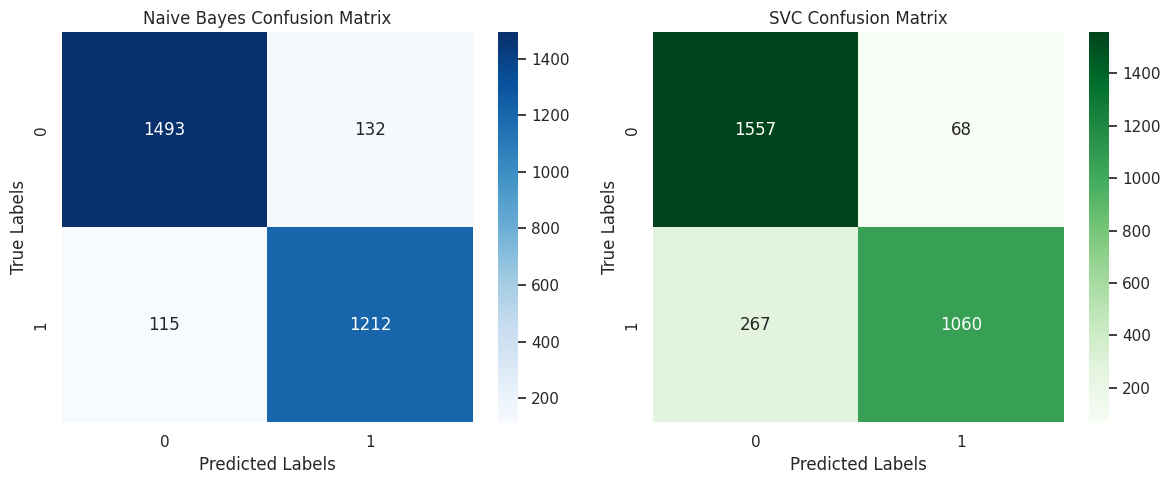

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit the models and make predictions
nb_model = GaussianNB().fit(X_train, y_train)
svc_model = SVC().fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)

# Confusion matrices
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
svc_conf_matrix = confusion_matrix(y_test, svc_predictions)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Naive Bayes Confusion Matrix
sns.heatmap(nb_conf_matrix, annot=True, ax=ax[0], cmap='Blues', fmt='g')
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# SVC Confusion Matrix
sns.heatmap(svc_conf_matrix, annot=True, ax=ax[1], cmap='Greens', fmt='g')
ax[1].set_title('SVC Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

## Prediction Model

In [76]:
# Initialize the models
nb_model = GaussianNB()
svc_model = SVC()

# Apply SMOTE to the training data for balancing
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the models on the training data
nb_model.fit(X_train_smote, y_train_smote)
svc_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
nb_predictions = nb_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)

# Output the predictions
print("Naive Bayes Predictions on Test Data:")
print(nb_predictions)

print("\nSVM Predictions on Test Data:")
print(svc_predictions)

Naive Bayes Predictions on Test Data:
[1 1 1 ... 1 0 0]

SVM Predictions on Test Data:
[1 1 1 ... 1 0 0]


# Submission

In [75]:
# Submit Method

# Do not change the code below
question_id = "01_ml_project_features"
submit(student_id, name, assignment_id, str(ml_features), question_id, drive_link)
question_id = "02_ml_project_accuracy"
submit(student_id, name, assignment_id, str(ml_accuracy), question_id, drive_link)
question_id = "03_ml_project_f1score"
submit(student_id, name, assignment_id, str(ml_f1_score), question_id, drive_link)

'Assignment successfully submitted'